# HOUSING: PRICE PREDICTION

# Problem Statement:

* Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.
* A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
* The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:

i) Which variables are important to predict the price of variable?

ii)How do these variables describe the price of the house?

### Business Goal:

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

In [2]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [3]:
# To print all columns and rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
#importing train dataset
df = pd.read_csv("train.csv") #Reading the csv file
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

Sales price is my target columns. above is data which I will use for my model training

In [5]:
# importing test dataset
dff = pd.read_csv("test.csv") #Reading the csv file
dff.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

Once our model is trained and ready for use then I will use above data to predict prices 

# EDA

In [6]:
# checking shape of the train dataset
df.shape

(1168, 81)

In [7]:
Our train data is having 1168 rows and 81 columns

SyntaxError: invalid syntax (<ipython-input-7-a143495a9b9a>, line 1)

In [8]:
# checking shape of the test dataset
dff.shape

(292, 80)

Test data is having 292 rows and 80 column. So as we know in this data our target is not given

In [9]:
# checking all column names of train dataset
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
# checking all column names of the train dataset
dff.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
# checking the data types of all columns in train dataset
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [12]:
# checking the data types of all columns in test dataset
dff.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


I have just check type of data in both datasent as we can see there are some Object data available in both datasent which we need to convert using encoding

In [13]:
# checking the info about the train dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [14]:
# Dropping unnecessary columns in train dataset
df = df.drop(["Alley"],axis=1)
df = df.drop(["PoolQC"],axis=1)
df = df.drop(["Fence"],axis=1)
df = df.drop(["MiscFeature"],axis=1)

In [15]:
# checking the info about the test dataset
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [16]:
# Dropping unnecessary columns in test dataset
dff = dff.drop(["Alley"],axis=1)
dff = dff.drop(["PoolQC"],axis=1)
dff = dff.drop(["Fence"],axis=1)
dff = dff.drop(["MiscFeature"],axis=1)

In [17]:
# checking unique values of each column in train dataset
df.nunique()

Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       106
LotArea           892
Street              2
LotShape            4
LandContour         4
Utilities           1
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         110
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        14
Exterior2nd        15
MasVnrType          4
MasVnrArea        283
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        551
BsmtFinType2        6
BsmtFinSF2        122
BsmtUnfSF         681
TotalBsmtSF       636
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          669
2ndFlrSF          351
LowQualFinSF       21
GrLivArea 

In [18]:
# Droping unnecessary columns in train dataset
df = df.drop(["Id"],axis=1)
df = df.drop(["Utilities"],axis=1)

In [19]:
# checking unique values of each column in test dataset
dff.nunique()


Id               292
MSSubClass        15
MSZoning           4
LotFrontage       65
LotArea          249
Street             2
LotShape           4
LandContour        4
Utilities          2
LotConfig          5
LandSlope          3
Neighborhood      24
Condition1         8
Condition2         2
BldgType           5
HouseStyle         8
OverallQual        8
OverallCond        7
YearBuilt         84
YearRemodAdd      57
RoofStyle          5
RoofMatl           3
Exterior1st       12
Exterior2nd       14
MasVnrType         4
MasVnrArea       104
ExterQual          4
ExterCond          4
Foundation         6
BsmtQual           4
BsmtCond           3
BsmtExposure       4
BsmtFinType1       6
BsmtFinSF1       184
BsmtFinType2       6
BsmtFinSF2        32
BsmtUnfSF        231
TotalBsmtSF      224
Heating            4
HeatingQC          4
CentralAir         2
Electrical         4
1stFlrSF         238
2ndFlrSF         113
LowQualFinSF       4
GrLivArea        246
BsmtFullBath       3
BsmtHalfBath 

In [20]:
# Droping unnecessary columns in test dataset
dff = dff.drop(["Id"],axis=1)
dff = dff.drop(["Utilities"],axis=1)

In [21]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column in train dataset.
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64
****************************************
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
****************************************
60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
65.0      35
85.0      26
90.0      20
78.0      19
73.0      16
24.0      16
68.0      16
79.0      14
21.0      14
64.0      14
72.0      13
51.0      13
55.0      13
100.0     12
82.0      12
59.0      12
63.0      11
74.0      11
71.0      11
53.0      10
66.0      10
69.0      10
88.0      10
34.0       9
67.0       9
84.0       9
52.0       8
40.0       8
43.0       8
76.0       8
92.0       8
77.0       8
62.0       7
57.0       7
61.0       7
86.0       7
35.0       7
95.0       7
44.0       6
81.0       6
94.0       6
41.0       6
54.0   

I can see more than 80% zero values in

* BsmtFinSF2
* LowQualFinSF
* EnclosedPorch
* 3SsnPorch
* ScreenPorch
* PoolArea
* MiscVal
So i have to drop these columns. In some other columns also there are zero values below 60% they are acceptable and also reasonable.

In [22]:
#Dropping unnecessary columns in train dataset
df.drop(columns = ['BsmtFinSF2','LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],inplace = True)

In [23]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column in test dataset.
for i in dff.columns:
        print(dff[i].value_counts())
        print('****************************************')

20     108
60      55
50      31
120     18
30      17
160     16
80      15
90      11
70       7
190      4
180      4
75       2
45       2
85       1
40       1
Name: MSSubClass, dtype: int64
****************************************
RL         223
RM          55
FV          13
C (all)      1
Name: MSZoning, dtype: int64
****************************************
60.0     32
85.0     14
50.0     13
70.0     12
80.0      9
21.0      9
65.0      9
75.0      7
52.0      6
78.0      6
63.0      6
66.0      5
64.0      5
57.0      5
74.0      4
55.0      4
43.0      4
40.0      4
72.0      4
100.0     4
67.0      3
76.0      3
24.0      3
79.0      3
90.0      3
44.0      3
110.0     3
68.0      3
86.0      3
102.0     3
93.0      3
48.0      3
96.0      2
35.0      2
107.0     2
32.0      2
42.0      2
37.0      2
62.0      2
51.0      2
56.0      2
58.0      2
92.0      2
47.0      2
73.0      2
83.0      2
91.0      2
98.0      2
120.0     1
45.0      1
33.0      1
137.0     1
150.0    

I can see more than 80% zero values in

* BsmtFinSF2
* LowQualFinSF
* EnclosedPorch
* 3SsnPorch
* ScreenPorch
* PoolArea
* MiscVal 

So i have to drop these columns. In some other columns also there are zero values below 60% they are acceptable and also reasonable.

In [24]:
#Dropping unnecessary columns in test dataset
dff.drop(columns = ['BsmtFinSF2','LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],inplace = True)

In [25]:
# checking null values in the  present train dataset
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         7
MasVnrArea         7
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinSF1         0
BsmtFinType2      31
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr 

In [26]:

# checking null values in the test dataset
dff.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr 

We have null values present in both of the data so we will treat them

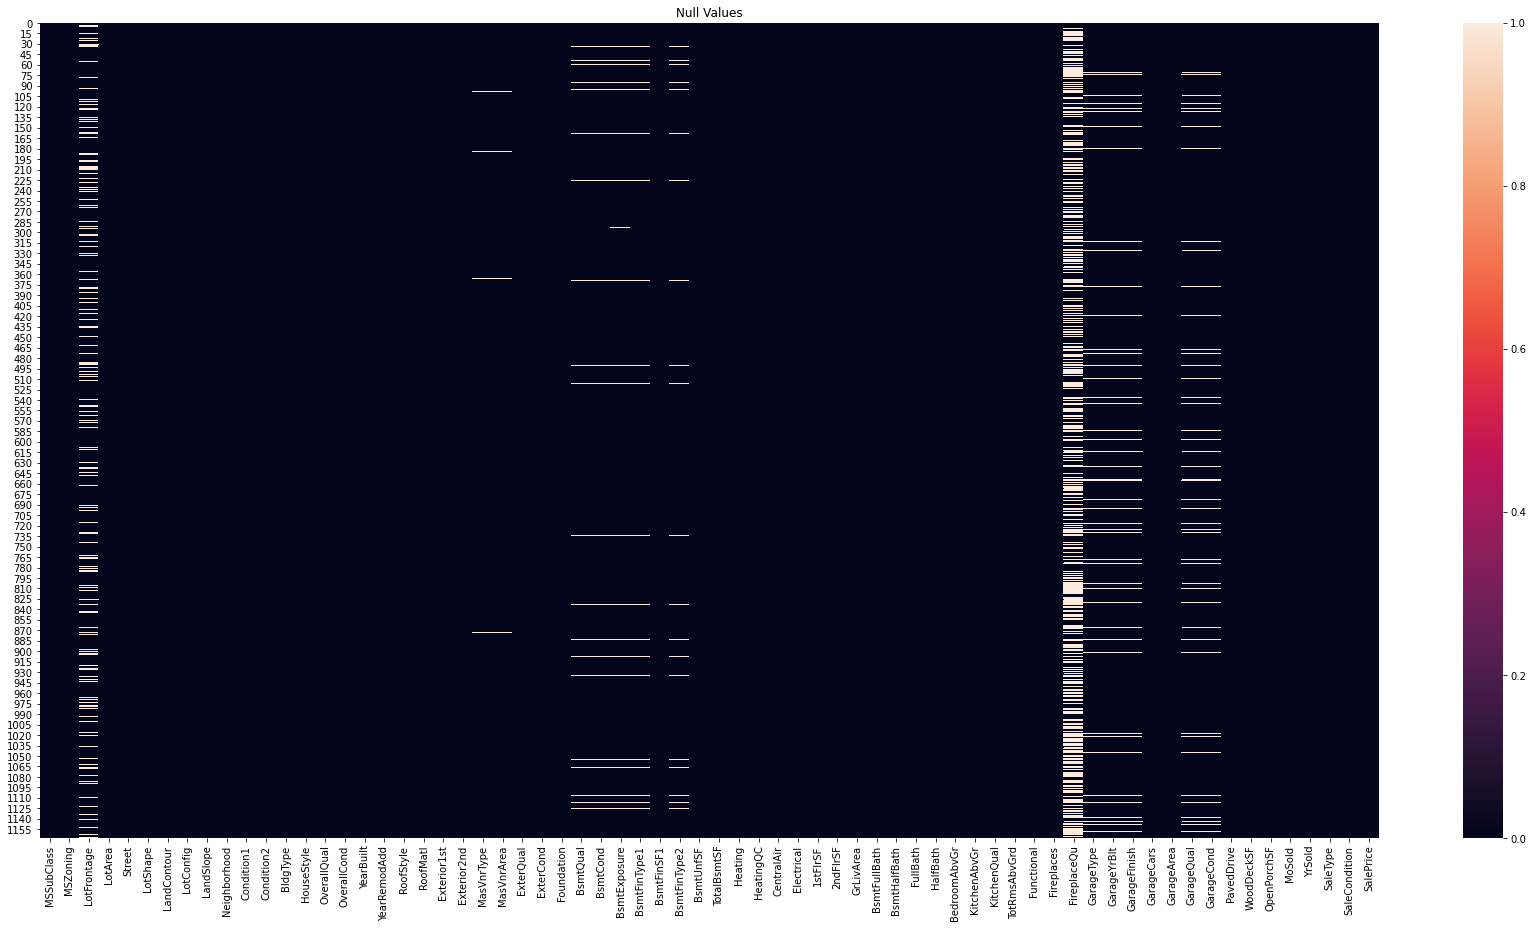

In [27]:
# Visualizing null values in train dataset
plt.figure(figsize=[30,15])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

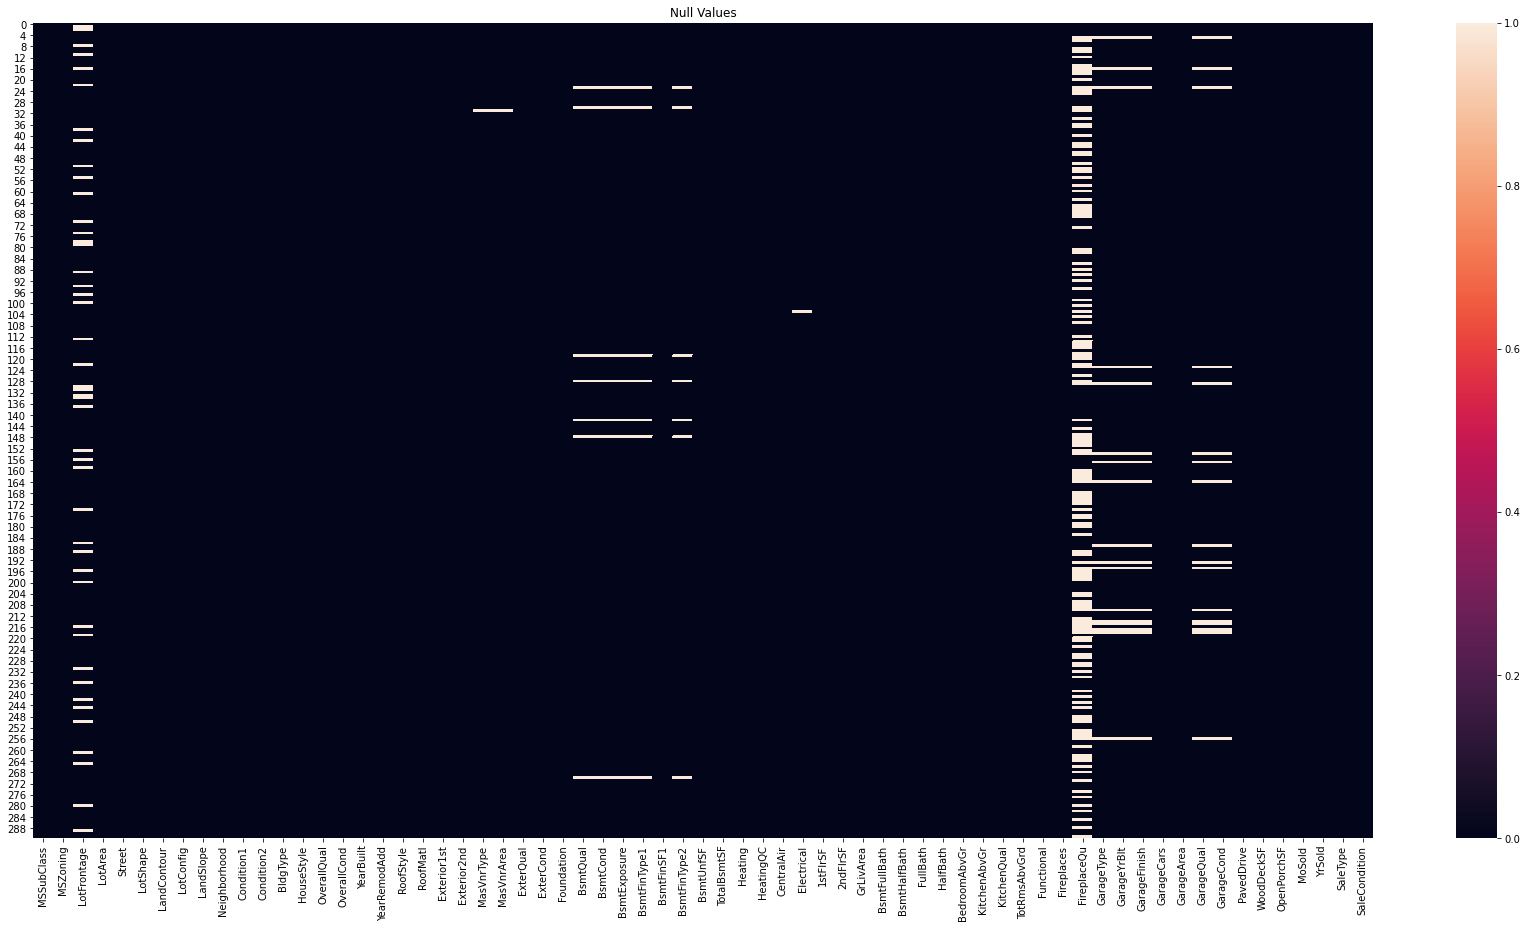

In [28]:
# Visualizing null values in test dataset
plt.figure(figsize=[30,15])
sns.heatmap(dff.isnull())
plt.title("Null Values")
plt.show()

# Imputation technique to replace nan values:

In [29]:
# creating a list of categorical and numerical datatypes in train dataset
df_categorical=[]
df_numerical=[]
for col in df.columns:
    if (df[col].dtype=='object'):
          df_categorical.append(col)
    else:
        df_numerical.append(col)

In [30]:
#creating a list of categorical and numerical datatypes in test dataset
dff_categorical=[]
dff_numerical=[]
for col in dff.columns:
    if (dff[col].dtype=='object'):
          dff_categorical.append(col)
    else:
        dff_numerical.append(col) 

In [31]:
# Replacing null values of categorical column with mode of that column in train dataset.
catcol=df.columns.values
for i in range(0,len(catcol)):
    if df[catcol[i]].dtype == "object":
        df[catcol[i]].fillna(df[catcol[i]].mode()[0], inplace=True)

In [32]:
# Replacing null values of categorical column with mode of that column in test dataset.
catcol1=dff.columns.values
for i in range(0,len(catcol1)):
    if dff[catcol1[i]].dtype == "object":
        dff[catcol1[i]].fillna(dff[catcol1[i]].mode()[0], inplace=True)

In [33]:
# Replacing null values of numerical column with mean of that column in train dataset.
numcol=df.columns.values
for i in range(0,len(numcol)):
    if df[numcol[i]].dtype != "object":
        df[numcol[i]].fillna(df[numcol[i]].mean(), inplace=True)

In [34]:
# Replacing null values of numerical column with mean of that column in test dataset.
numcol1=dff.columns.values
for i in range(0,len(numcol1)):
    if dff[numcol1[i]].dtype != "object":
        dff[numcol1[i]].fillna(dff[numcol1[i]].mean(), inplace=True)

In [35]:
# checking null values again in train dataset
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu 

In [36]:

# checking null values again in test dataset
dff.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu 

We can see that we have imputed null values with mean and mode as per their datatype and now we dont have any missing or null value in dataset

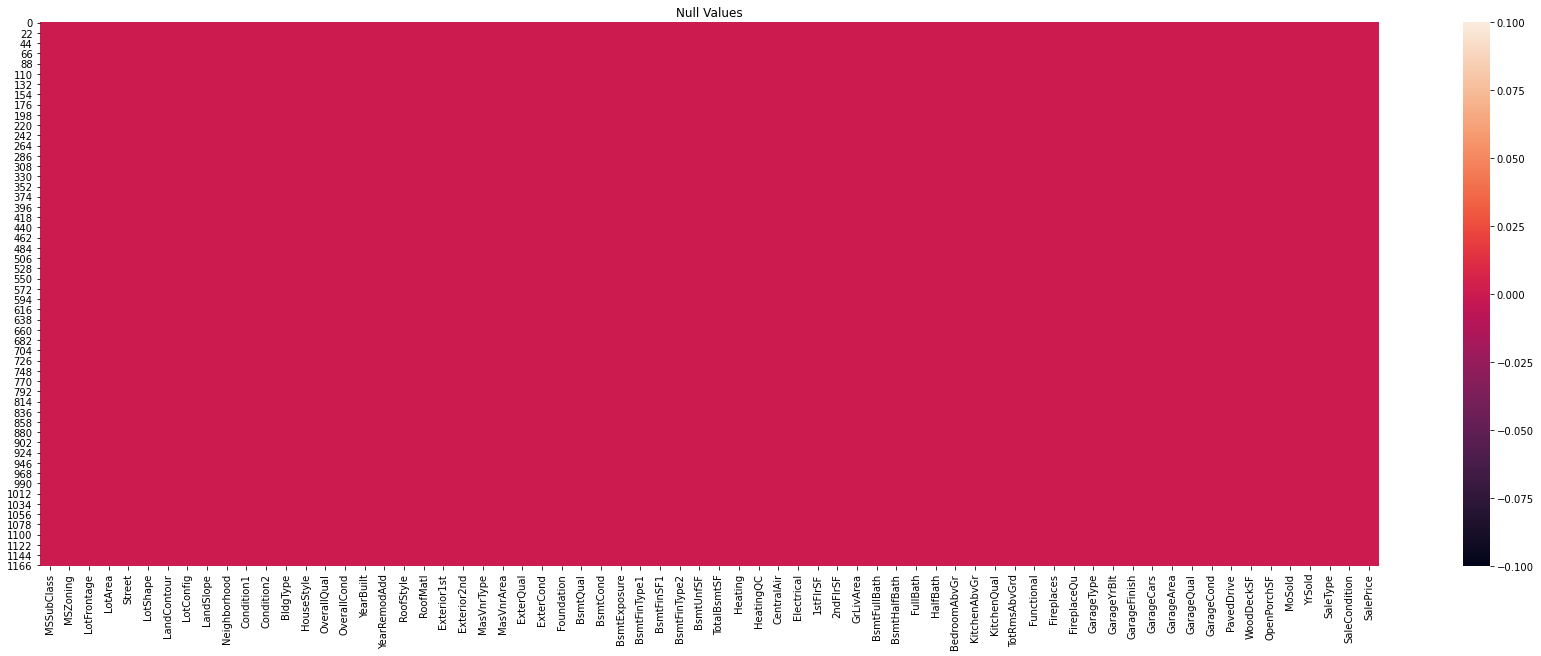

In [37]:
#Visualizeing null values again after imputation in train dataset
plt.figure(figsize=[30,10])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

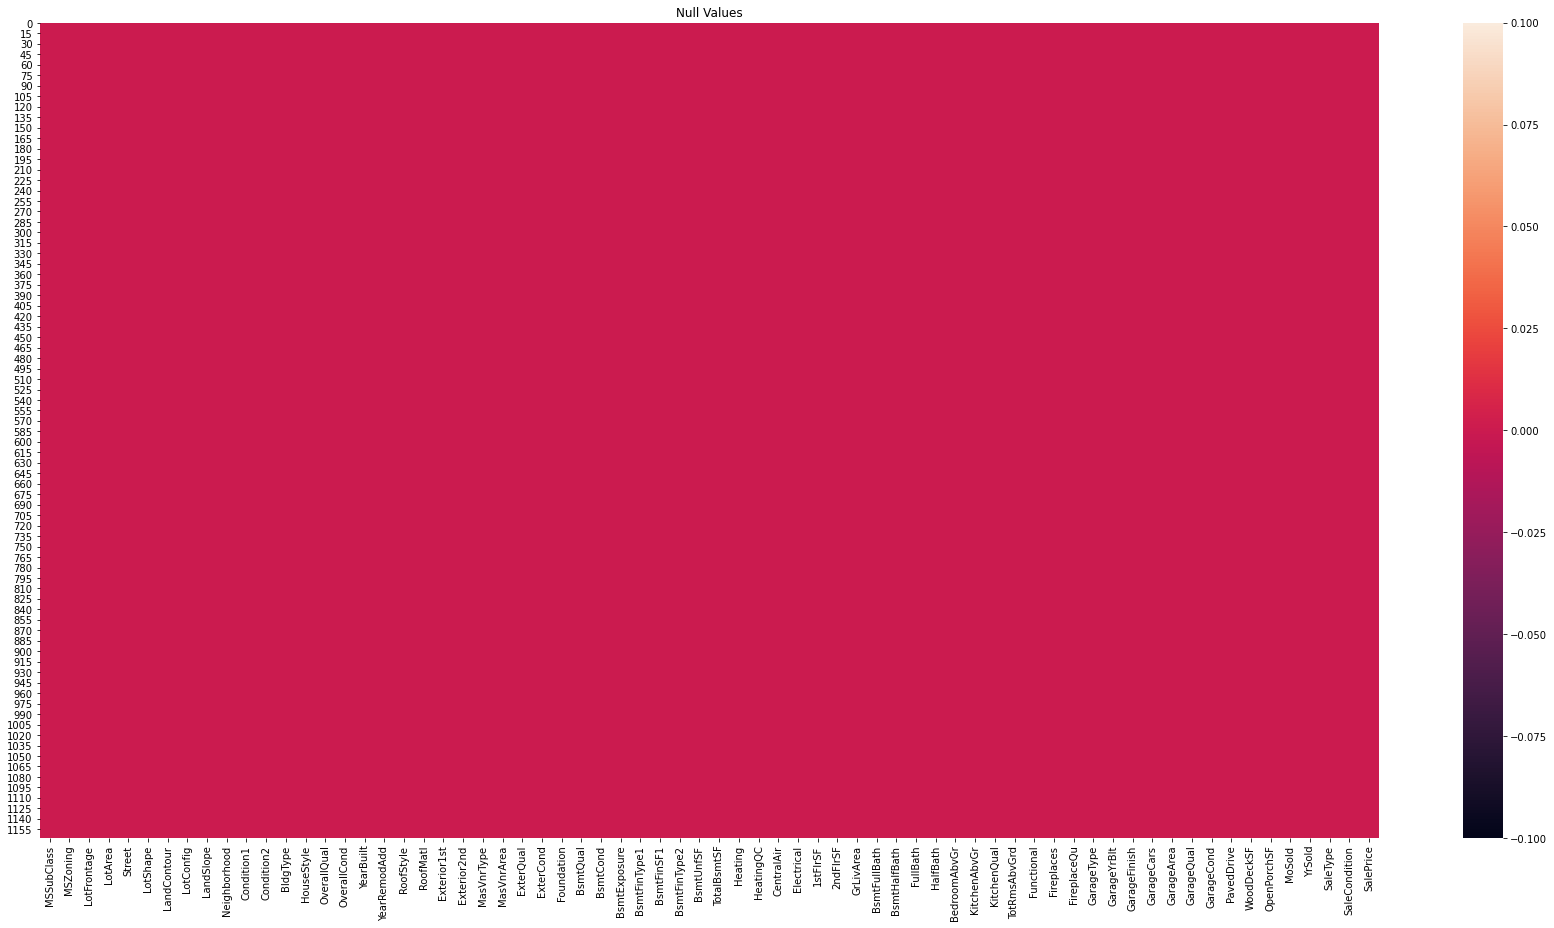

In [40]:
# Visualizing null values again after imputation in test dataset
plt.figure(figsize=[30,15])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [41]:
# checking for empty observations in target column
df.loc[df['SalePrice'] == " "]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

# Feature Extraction:

In [42]:
# Converting years column to age column in train dataset
df['Year_SinceBuilt'] = df['YearBuilt'].max() - df['YearBuilt']
df['Year_SinceRemodAdded'] = df['YearRemodAdd'].max() - df['YearRemodAdd']
df['Year_SinceSold'] = df['YrSold'].max() - df['YrSold']
df['GarageAge'] = df['GarageYrBlt'].max() - df['GarageYrBlt']

In [43]:
# Dropping old columns in train dataset
df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [44]:
# Converting years column to age column in test dataset
dff['Year_SinceBuilt'] = dff['YearBuilt'].max() - dff['YearBuilt']
dff['Year_SinceRemodAdded'] = dff['YearRemodAdd'].max() - dff['YearRemodAdd']
dff['Year_SinceSold'] = dff['YrSold'].max() - dff['YrSold']
dff['GarageAge'] = dff['GarageYrBlt'].max() - dff['GarageYrBlt']

In [45]:
# Dropping old columns in test dataset
dff.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [46]:
# checking description of data set in train dataset
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     56.767979    70.988470   10484.749144     6.104452     5.595890   
std      41.940650    22.437056    8957.442311     1.390153     1.124343   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7621.500000     5.000000     5.000000   
50%      50.000000    70.988470    9522.500000     6.000000     5.000000   
75%      70.000000    79.250000   11515.500000     7.000000     6.000000   
max     190.000000   313.000000  164660.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean    102.310078   444.726027   569.721747  1061.095034  1169.860445   
std     182.047152   462.664785   449.375525   442.272249   391.161983   
min       0.000000     0.000000     0.000000     0.000000   334.000000   
25%       0.000000     0.000000   216.000000   799.000000   892.000000   
50%       0.000000   385.500000   474.000000  1005.500000  1096.500000   
75%     160.000000   714.500000   816.000000  1291.500000  1392.000000   
max    1600.000000  5644.000000  2336.000000  6110.000000  4692.000000   

          2ndFlrSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count  1168.000000  1168.000000   1168.000000   1168.000000  1168.000000   
mean    348.826199  1525.066781      0.425514      0.055651     1.562500   
std     439.696370   528.042957      0.521615      0.236699     0.551882   
min       0.000000   334.000000      0.000000      0.000000     0.000000   
25%       0.000000  1143.250000      0.000000      0.000000     1.000000   
50%       0.000000  1468.500000      0.000000      0.000000     2.000000   
75%     729.000000  1795.000000      1.000000      0.000000     2.000000   
max    2065.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1168.000000   1168.000000   1168.000000   1168.000000  1168.000000   
mean      0.388699      2.884418      1.045377      6.542808     0.617295   
std       0.504929      0.817229      0.216292      1.598484     0.650575   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF       MoSold  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      1.776541   476.860445    96.206336    46.559932     6.344178   
std       0.745554   214.466769   126.158988    66.381023     2.686352   
min       0.000000     0.000000     0.000000     0.000000     1.000000   
25%       1.000000   338.000000     0.000000     0.000000     5.000000   
50%       2.000000   480.000000     0.000000    24.000000     6.000000   
75%       2.000000   576.000000   171.000000    70.000000     8.000000   
max       4.000000  1418.000000   857.000000   547.000000    12.000000   

           SalePrice  Year_SinceBuilt  Year_SinceRemodAdded  Year_SinceSold  \
count    1168.000000      1168.000000           1168.000000     1168.000000   
mean   181477.005993        39.069349             25.241438        2.195205   
std     79105.586863        30.145255             20.785185        1.329738   
min     34900.000000         0.000000              0.000000        0.000000   
25%    130375.000000        10.000000              6.000000        1.000000   
50%    163995.000000        38.000000             17.000000        2.000000   
75%    215000.000000        56.000000             44.0000

In [47]:
# checking description of data set in test dataset
dff.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  292.000000   292.000000     292.000000   292.000000   292.000000   
mean    57.414384    66.425101   10645.143836     6.078767     5.493151   
std     43.780649    19.975962   13330.669795     1.356147     1.063267   
min     20.000000    21.000000    1526.000000     3.000000     3.000000   
25%     20.000000    57.750000    7200.000000     5.000000     5.000000   
50%     50.000000    66.425101    9200.000000     6.000000     5.000000   
75%     70.000000    76.000000   11658.750000     7.000000     6.000000   
max    190.000000   150.000000  215245.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count   292.000000   292.000000   292.000000   292.000000   292.000000   
mean    109.171821   439.294521   557.315068  1042.767123  1133.691781   
std     174.729023   429.559675   411.043768   424.561153   366.941919   
min       0.000000     0.000000     0.000000     0.000000   372.000000   
25%       0.000000     0.000000   255.000000   771.750000   858.000000   
50%       0.000000   369.500000   487.000000   971.000000  1047.500000   
75%     180.000000   700.500000   780.000000  1322.000000  1370.500000   
max    1031.000000  1767.000000  1935.000000  3094.000000  2402.000000   

          2ndFlrSF    GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath  \
count   292.000000   292.000000    292.000000    292.000000  292.000000   
mean    339.657534  1477.051370      0.424658      0.065068    1.575342   
std     424.278825   514.199429      0.508831      0.247070    0.547856   
min       0.000000   520.000000      0.000000      0.000000    0.000000   
25%       0.000000  1061.500000      0.000000      0.000000    1.000000   
50%       0.000000  1440.000000      0.000000      0.000000    2.000000   
75%     717.000000  1720.250000      1.000000      0.000000    2.000000   
max    1589.000000  3447.000000      2.000000      1.000000    3.000000   

         HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
count  292.000000    292.000000     292.00000    292.000000  292.000000   
mean     0.359589      2.794521       1.05137      6.417808    0.595890   
std      0.494795      0.807336       0.23616      1.728105    0.621259   
min      0.000000      0.000000       1.00000      3.000000    0.000000   
25%      0.000000      2.000000       1.00000      5.000000    0.000000   
50%      0.000000      3.000000       1.00000      6.000000    1.000000   
75%      1.000000      3.000000       1.00000      7.000000    1.000000   
max      2.000000      6.000000       3.00000     12.000000    2.000000   

       GarageCars   GarageArea  WoodDeckSF  OpenPorchSF      MoSold  \
count  292.000000   292.000000  292.000000   292.000000  292.000000   
mean     1.729452   457.458904   86.397260    47.061644    6.232877   
std      0.754430   210.785591  121.898836    65.865449    2.774556   
min      0.000000     0.000000    0.000000     0.000000    1.000000   
25%      1.000000   300.000000    0.000000     0.000000    4.000000   
50%      2.000000   467.500000    0.000000    28.500000    6.000000   
75%      2.000000   569.750000  149.250000    66.000000    8.000000   
max      4.000000  1052.000000  728.000000   418.000000   12.000000   

       Year_SinceBuilt  Year_SinceRemodAdded  Year_SinceSold   GarageAge  
count       292.000000            292.000000      292.000000  292.000000  
mean         36.383562             24.705479        2.140411   30.240000  
std          30.447016             20.105792        1.322867   23.161183  
min           0.000000              0.000000        0.000000    0.000000  
25%           8.000000              6.750000        1.000000    8.000000  
50%          33.000000             16.000000        2.000000   30.240000  
75%          55.000000             42.000000        3.000000   45.000000  
max         137.000000             60.000000        4.000000   94.000000

**Visualization:**

### Univariate Analysis:

In [48]:
# checking for categorical columns in train dataset
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [49]:
# checking for categorical columns in test dataset
categorical_columns1=[]
for i in dff.dtypes.index:
    if dff.dtypes[i]=='object':
        categorical_columns1.append(i)
print(categorical_columns1)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [50]:
# now checking for numerical columns in train dataset
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'SalePrice', 'Year_SinceBuilt', 'Year_SinceRemodAdded', 'Year_SinceSold', 'GarageAge']


In [51]:
# now checking for numerical columns in test dataset
numerical_columns1=[]
for i in dff.dtypes.index:
    if dff.dtypes[i]!='object':
        numerical_columns1.append(i)
print(numerical_columns1)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'Year_SinceBuilt', 'Year_SinceRemodAdded', 'Year_SinceSold', 'GarageAge']


# Univariate analysis for numerical columns:

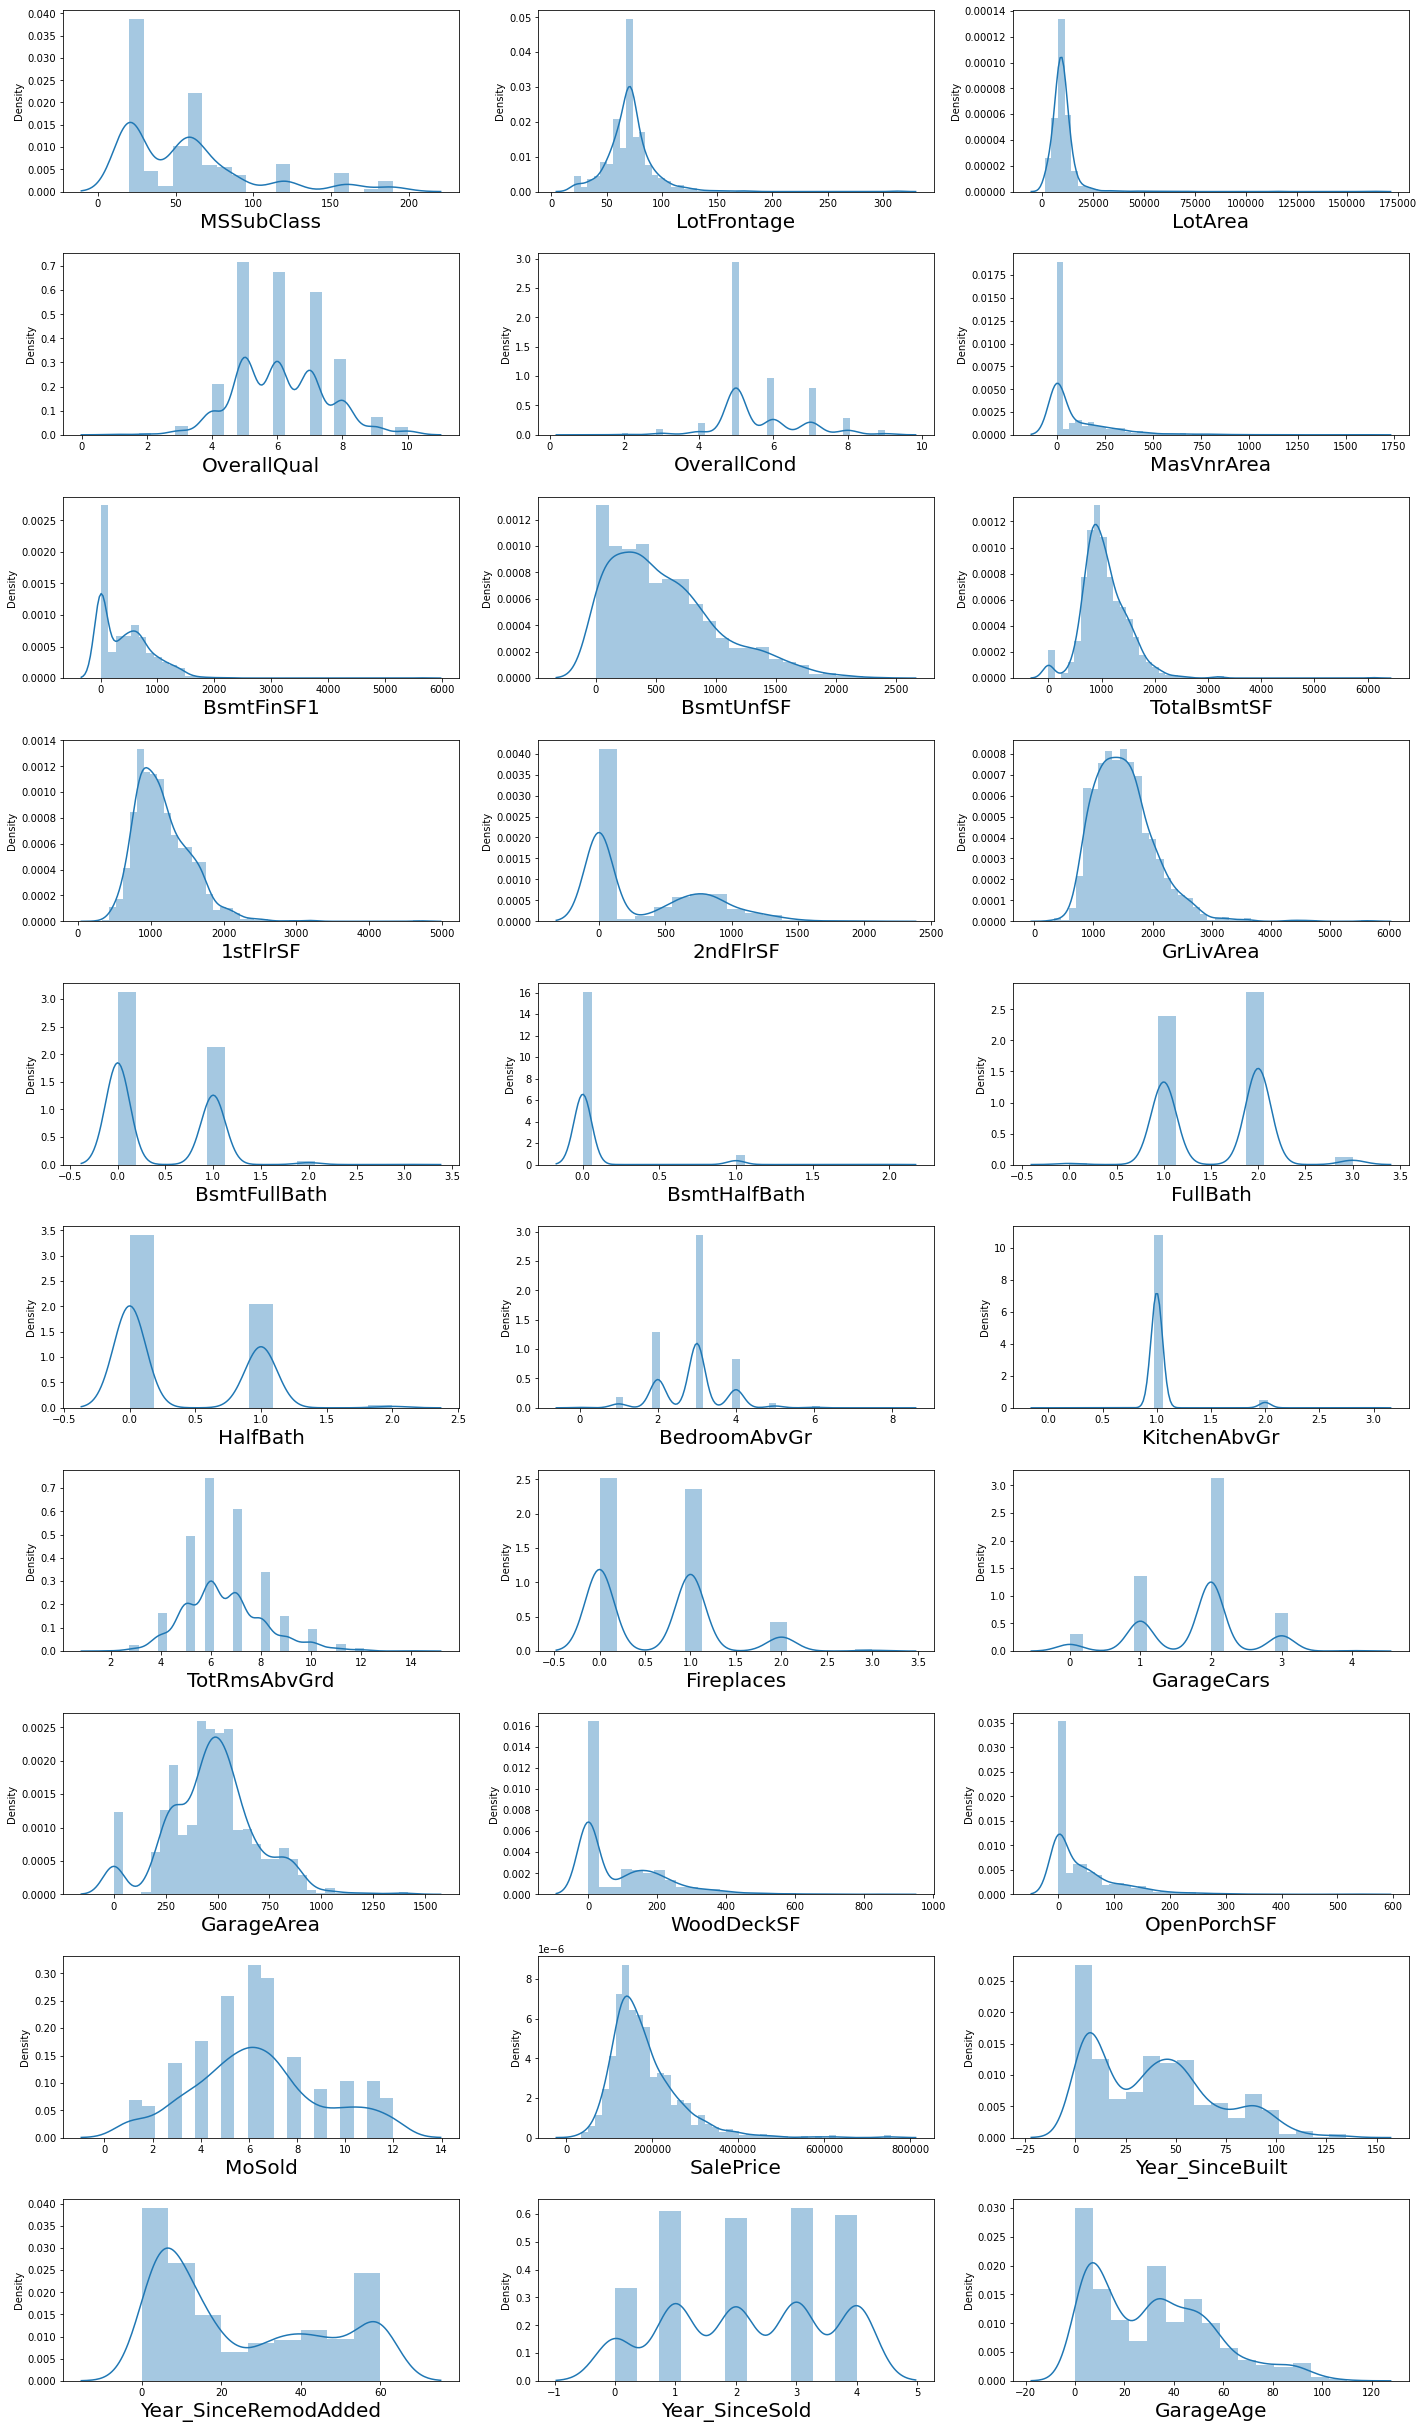

In [52]:
# distribution plot for all numerical columns
plt.figure(figsize = (20,40))
plotnumber = 1
for column in df[numerical_columns]:
    if plotnumber <=35:
        ax = plt.subplot(12,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

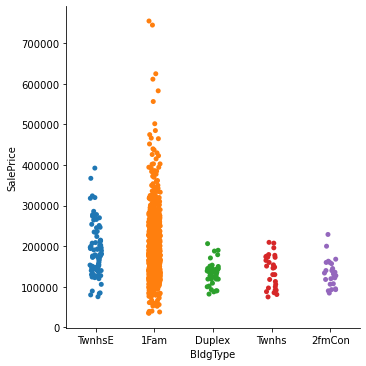

In [53]:
sns.catplot(x="BldgType",y="SalePrice", data=df)

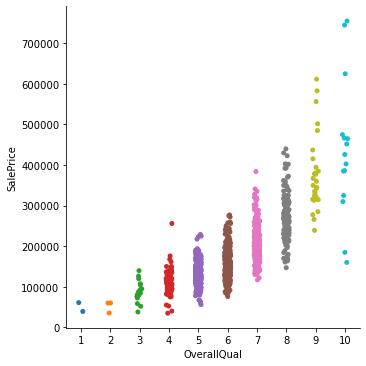

In [54]:
sns.catplot(x="OverallQual",y="SalePrice", data=df)

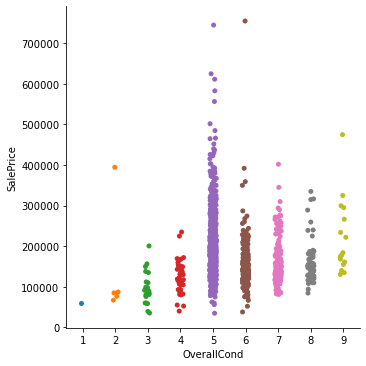

In [55]:

sns.catplot(x="OverallCond",y="SalePrice", data=df)

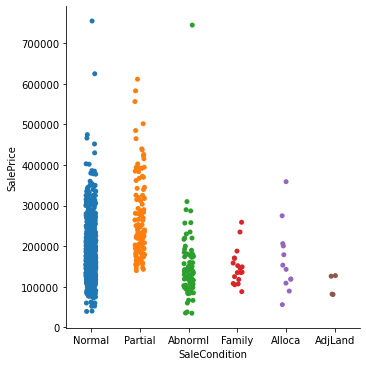

In [56]:
sns.catplot(x="SaleCondition",y="SalePrice", data=df)

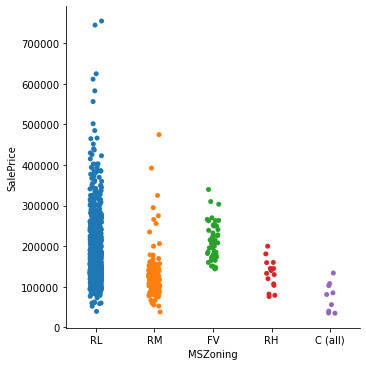

In [57]:
sns.catplot(x="MSZoning",y="SalePrice", data=df)

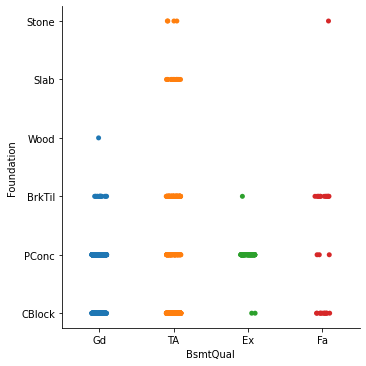

In [58]:
sns.catplot(x="BsmtQual",y="Foundation", data=df)

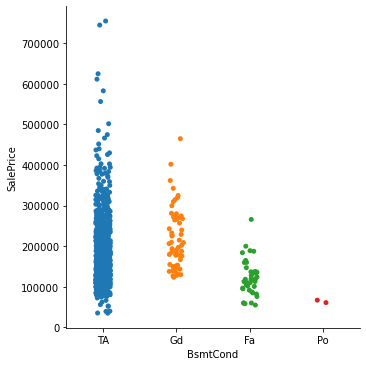

In [59]:
sns.catplot(x="BsmtCond",y="SalePrice", data=df)

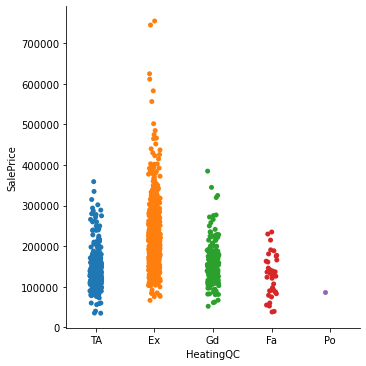

In [60]:
sns.catplot(x="HeatingQC",y="SalePrice", data=df)

## Univariate analysis for categorical columns:

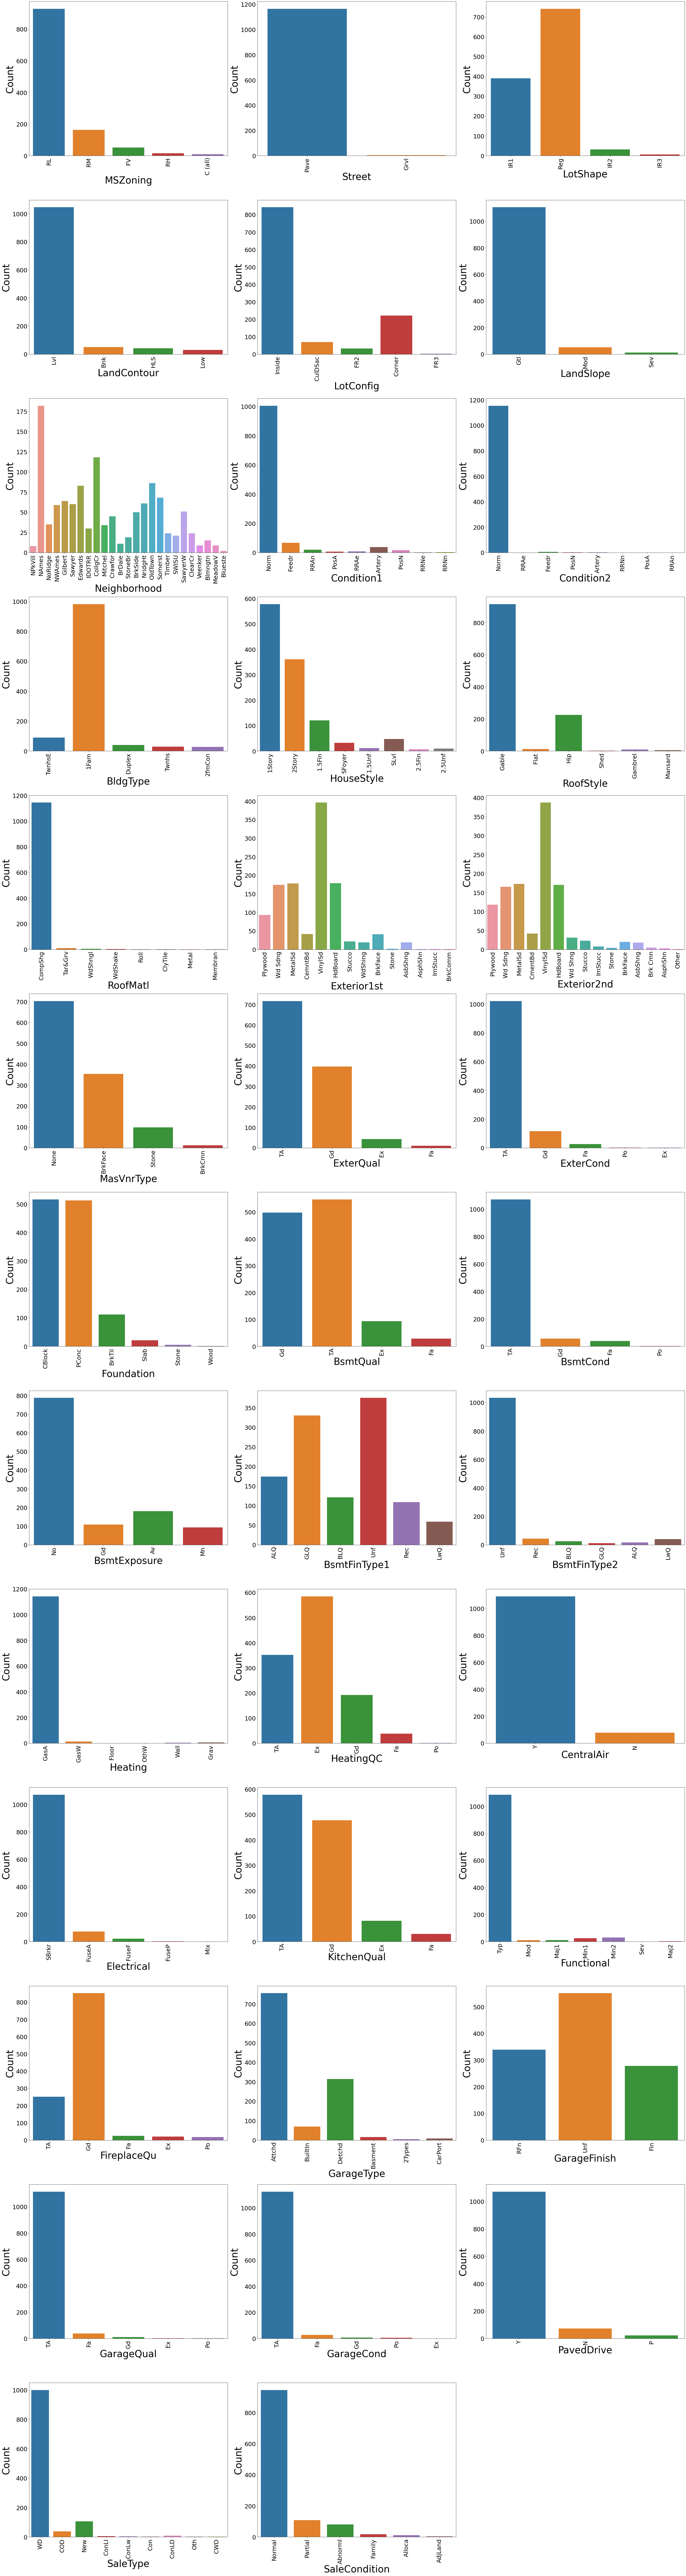

In [61]:
# Bar plot for all categorical columns
plt.figure(figsize = (40,150))
plotnumber = 1
for column in df[categorical_columns]:
    if plotnumber <=40:
        ax = plt.subplot(13,3,plotnumber)
        sns.countplot(df[column])
        plt.xticks(rotation=90,fontsize = 25)
        plt.yticks(rotation=0,fontsize = 25)
        plt.xlabel(column,fontsize = 40)
        plt.ylabel('Count',fontsize = 40)
    plotnumber+=1
plt.tight_layout()

* RL has maximum count in MSzoning and C all has very low sontribution
* street Pave looks famous Street as count is high
* Lotshape Reg has highest count in all shape
* LandContour Lvl has highest count and low is very less
* Housestyle 1story is maximum preferrence and 25story is second largest
* Roofstyle Hip and Gable is the most preferred styles
* Roofmati compshg is the most high used type
* C block and PConc are most used in Foundation
* Most of the housed are having CentralAir systme
* KitchenQual TA and gd are famous one


# Bivariate Analysis:

### Bivariate Analysis for numerical columns:

In [62]:
col=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF']

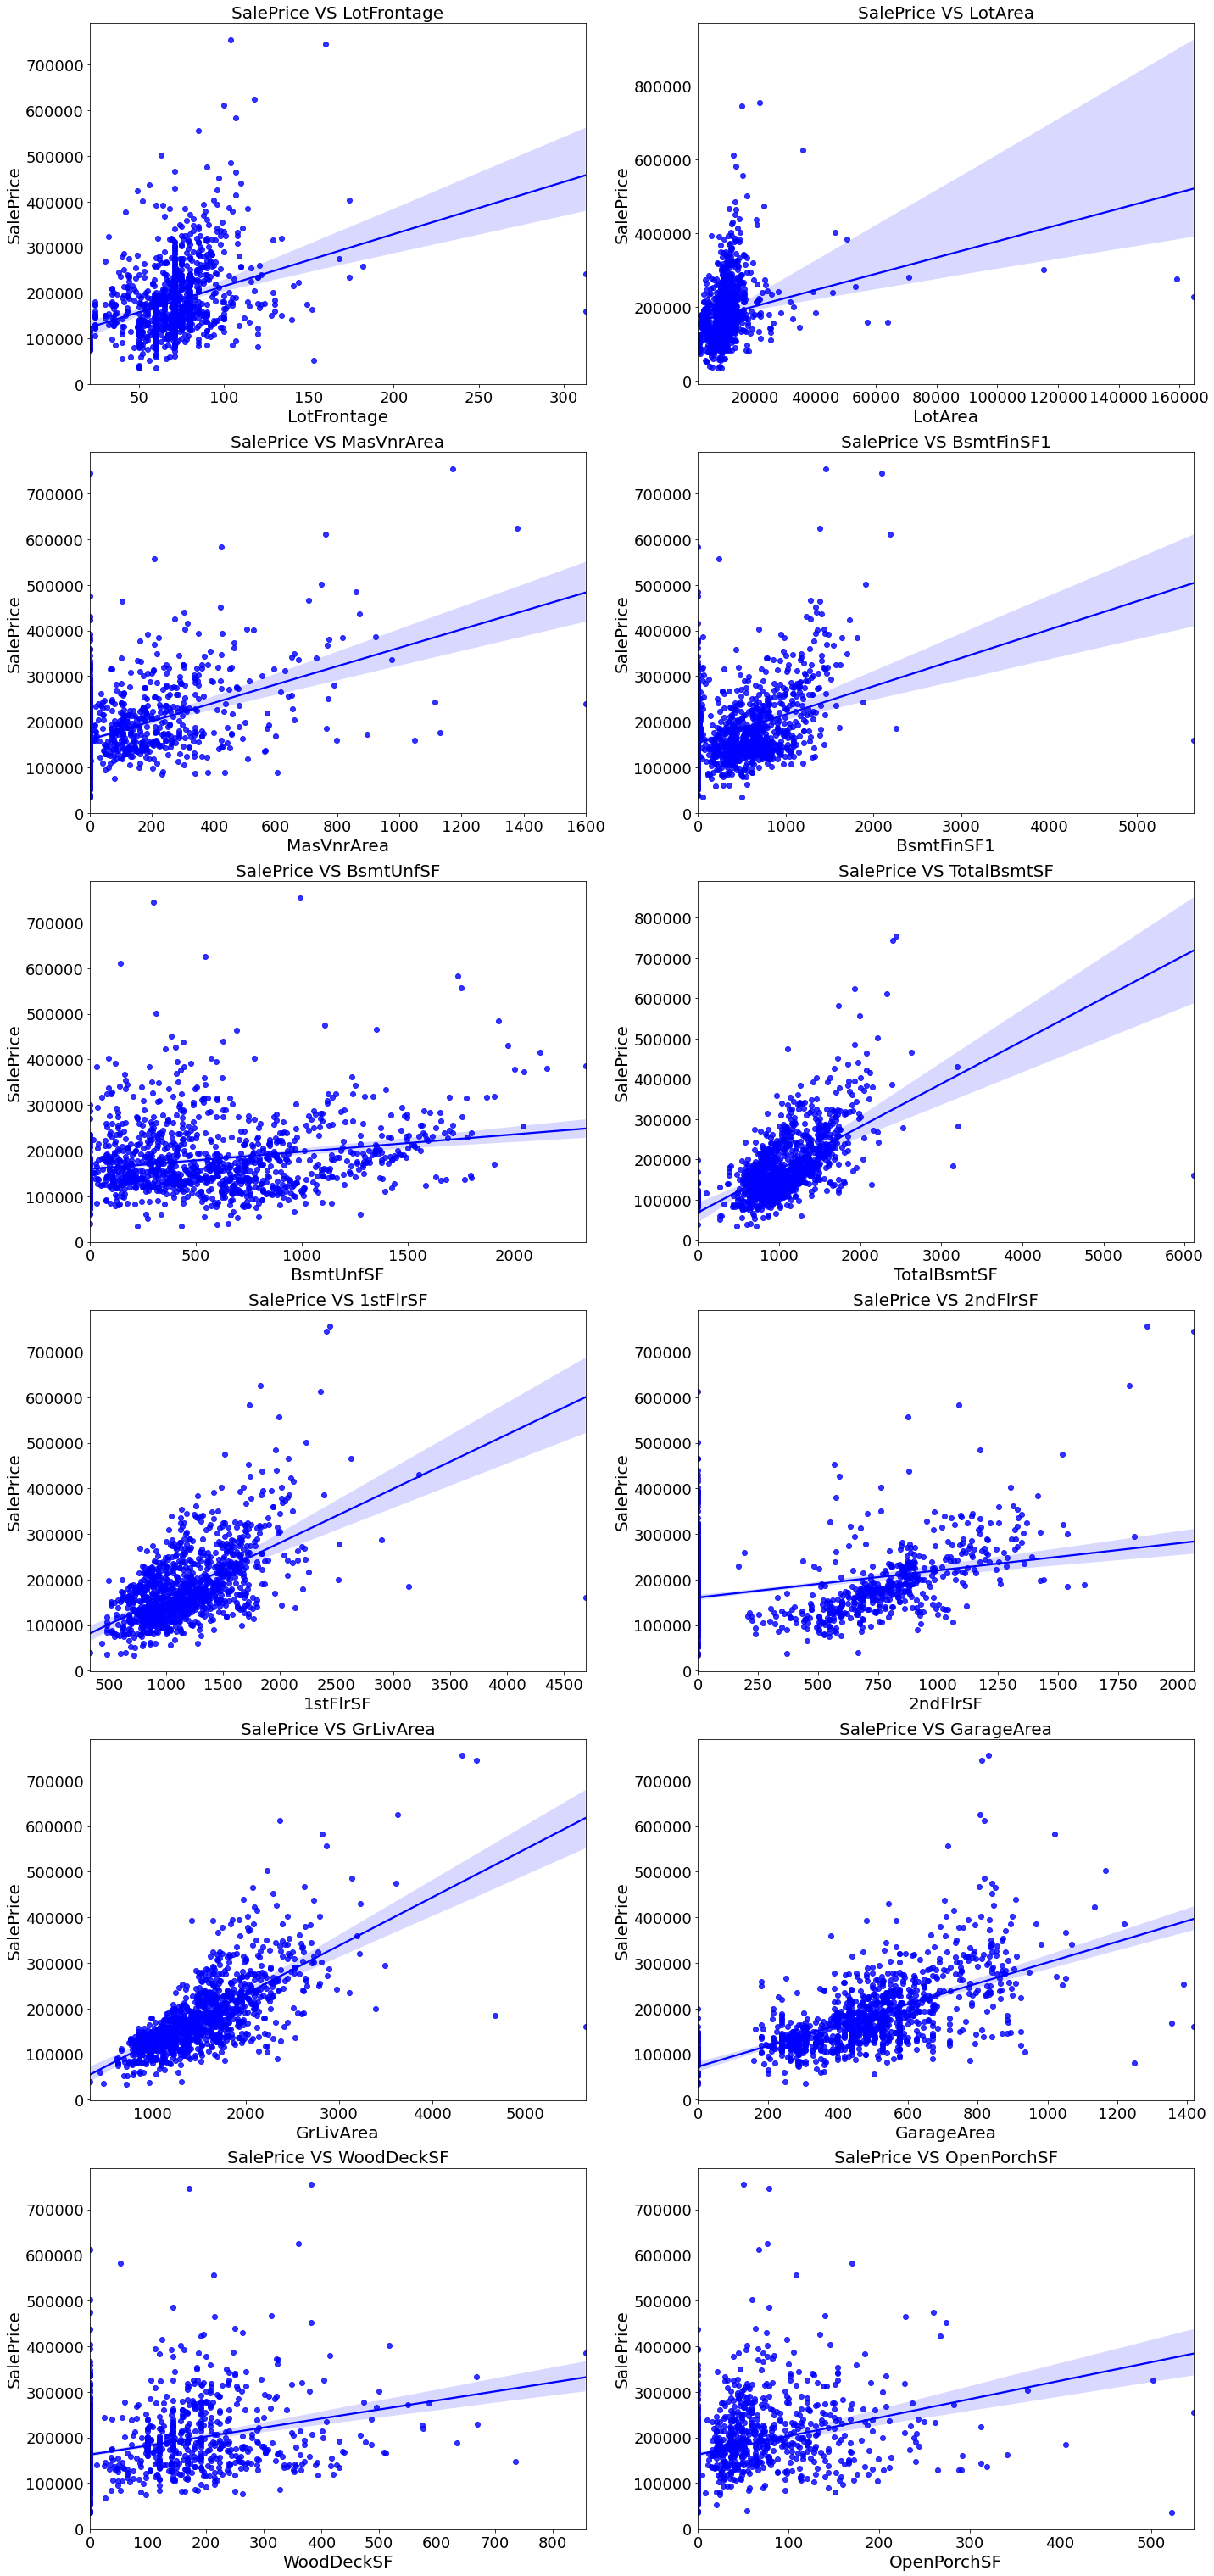

In [63]:
# regplot for numerical columns
plt.figure(figsize=(20,140))
for i in range(len(col)):
    plt.subplot(20,2,i+1)
    sns.regplot(x=df[col[i]] , y=df['SalePrice'],color="b")
    plt.title(f"SalePrice VS {col[i]}",fontsize=20)
    plt.xticks(fontsize=18)  
    plt.yticks(fontsize=18)
    plt.xlabel(col[i],fontsize = 20)
    plt.ylabel('SalePrice',fontsize = 20)
    plt.tight_layout()


* 1.As Linear feet of street connected to property(LotFrontage) is increasing sales is decreasing and the SalePrice is rangeing between 0-3 lakhs.
* 2.As Lot size in square feet(LotArea) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.
* 3.As Masonry veneer area in square feet(MasVnrArea) is increasing sales is decreasing and saleprice is rangeing between 0-4 lakhs.
* 4.As Type 1 finished square feet(BsmtFinSF1) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.
* 5.As Unfinished square feet of basement area(BsmtUnfSF) is increasing sales is decreasing and the saleprice is in between 0-4 lakhs. There are some outliers also.
* 6.As Total square feet of basement area(TotalBsmtSF) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.
* 7.As First Floor square feet(1stFlrSF) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.
* 8.As Second floor square feet(2ndFlrSF) is increseing sales is increasing in the range 500-1000 and the saleprice is in between 0-4 lakhs.
* 9.As Above grade (ground) living area square feet(GrLivArea) is increasing sales is decreasing and the saleprice is in between 0-4 lakhs.
* 10.As Size of garage in square feet(GarageArea) is increasing sales is increasing and the saleprice is in between 0-4 lakhs.
* 11.As Wood deck area in square feet(WoodDeckSF) is increasing sales is decreasing and the saleprice is in between 0-4 lakhs.

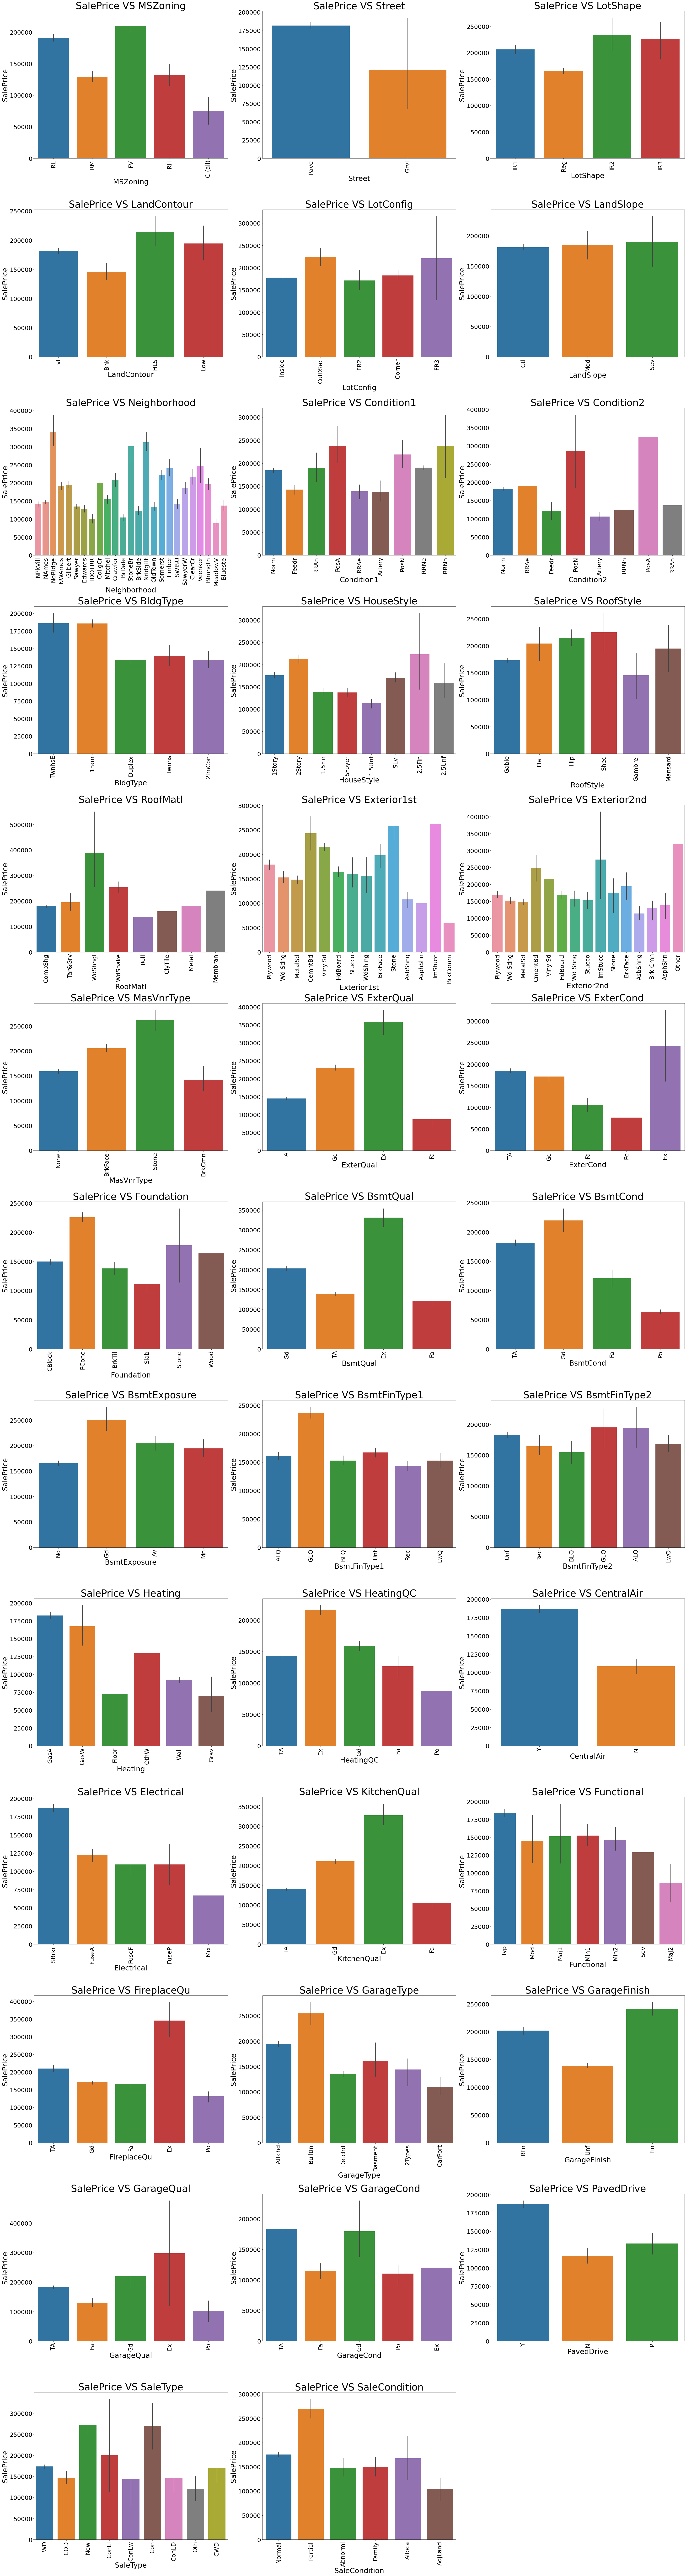

In [64]:
# Bar plot for all categorical columns
plt.figure(figsize=(40,150))
for i in range(len(categorical_columns)):
    plt.subplot(13,3,i+1)
    sns.barplot(y=df['SalePrice'],x=df[categorical_columns[i]])
    plt.title(f"SalePrice VS {categorical_columns[i]}",fontsize=40)
    plt.xticks(rotation=90,fontsize=25)  
    plt.yticks(rotation=0,fontsize=25)
    plt.xlabel(categorical_columns[i],fontsize = 30)
    plt.ylabel('SalePrice',fontsize = 30)
    plt.tight_layout()

# Cheking outliers

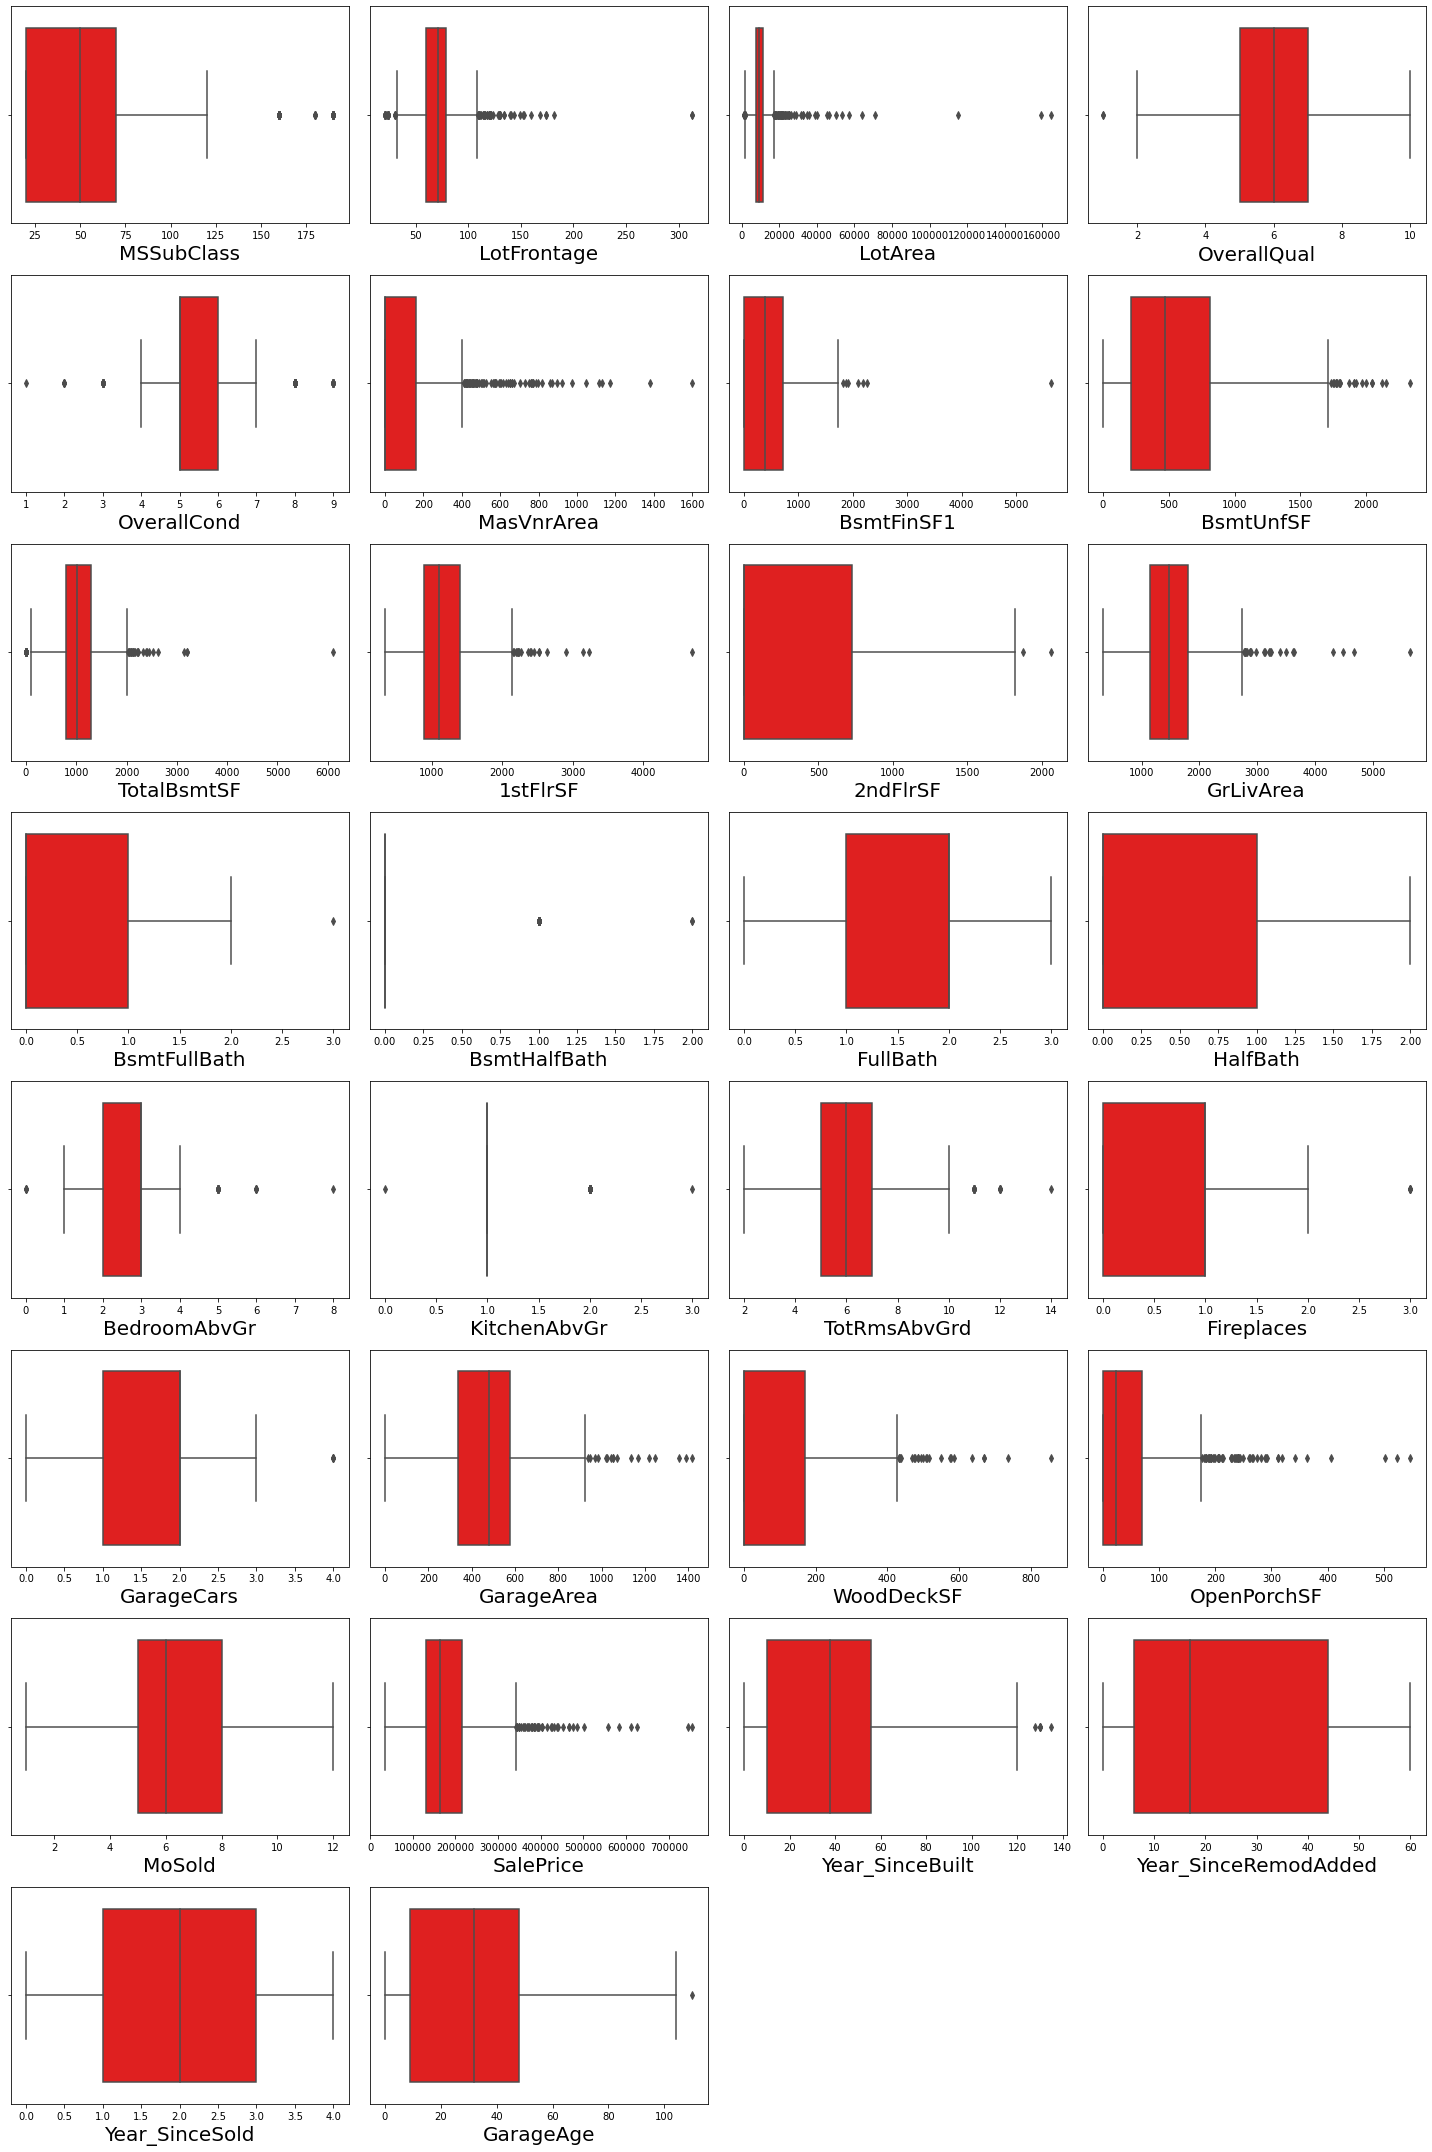

In [65]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(df[column],color='red')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

**Below are the columns with outliers**

* MSSubClass

* LotFrontage

* LotArea

* OverallQual

* OverallCond

* MasVnrArea

* BsmtFinSF1

* BsmtUnfSF

* TotalBsmtSF

* 1stFlrSF

* 2ndFlrSF

* GrLivArea

* BsmtFullBath

* BsmtHalfBath

* BedroomAbvGr

* KitchenAbvGr

* TotRmsAbvGrd

* Fireplaces

* GarageCars

* GarageArea

* WoodDeckSF

* OpenPorchSF

* Year_SinceBuilt

* GarageAge

* SalePrice

**we can see that salesprice is our target column hence we should not remove outliers for it. and we should only handle outliers for numarical columnd**

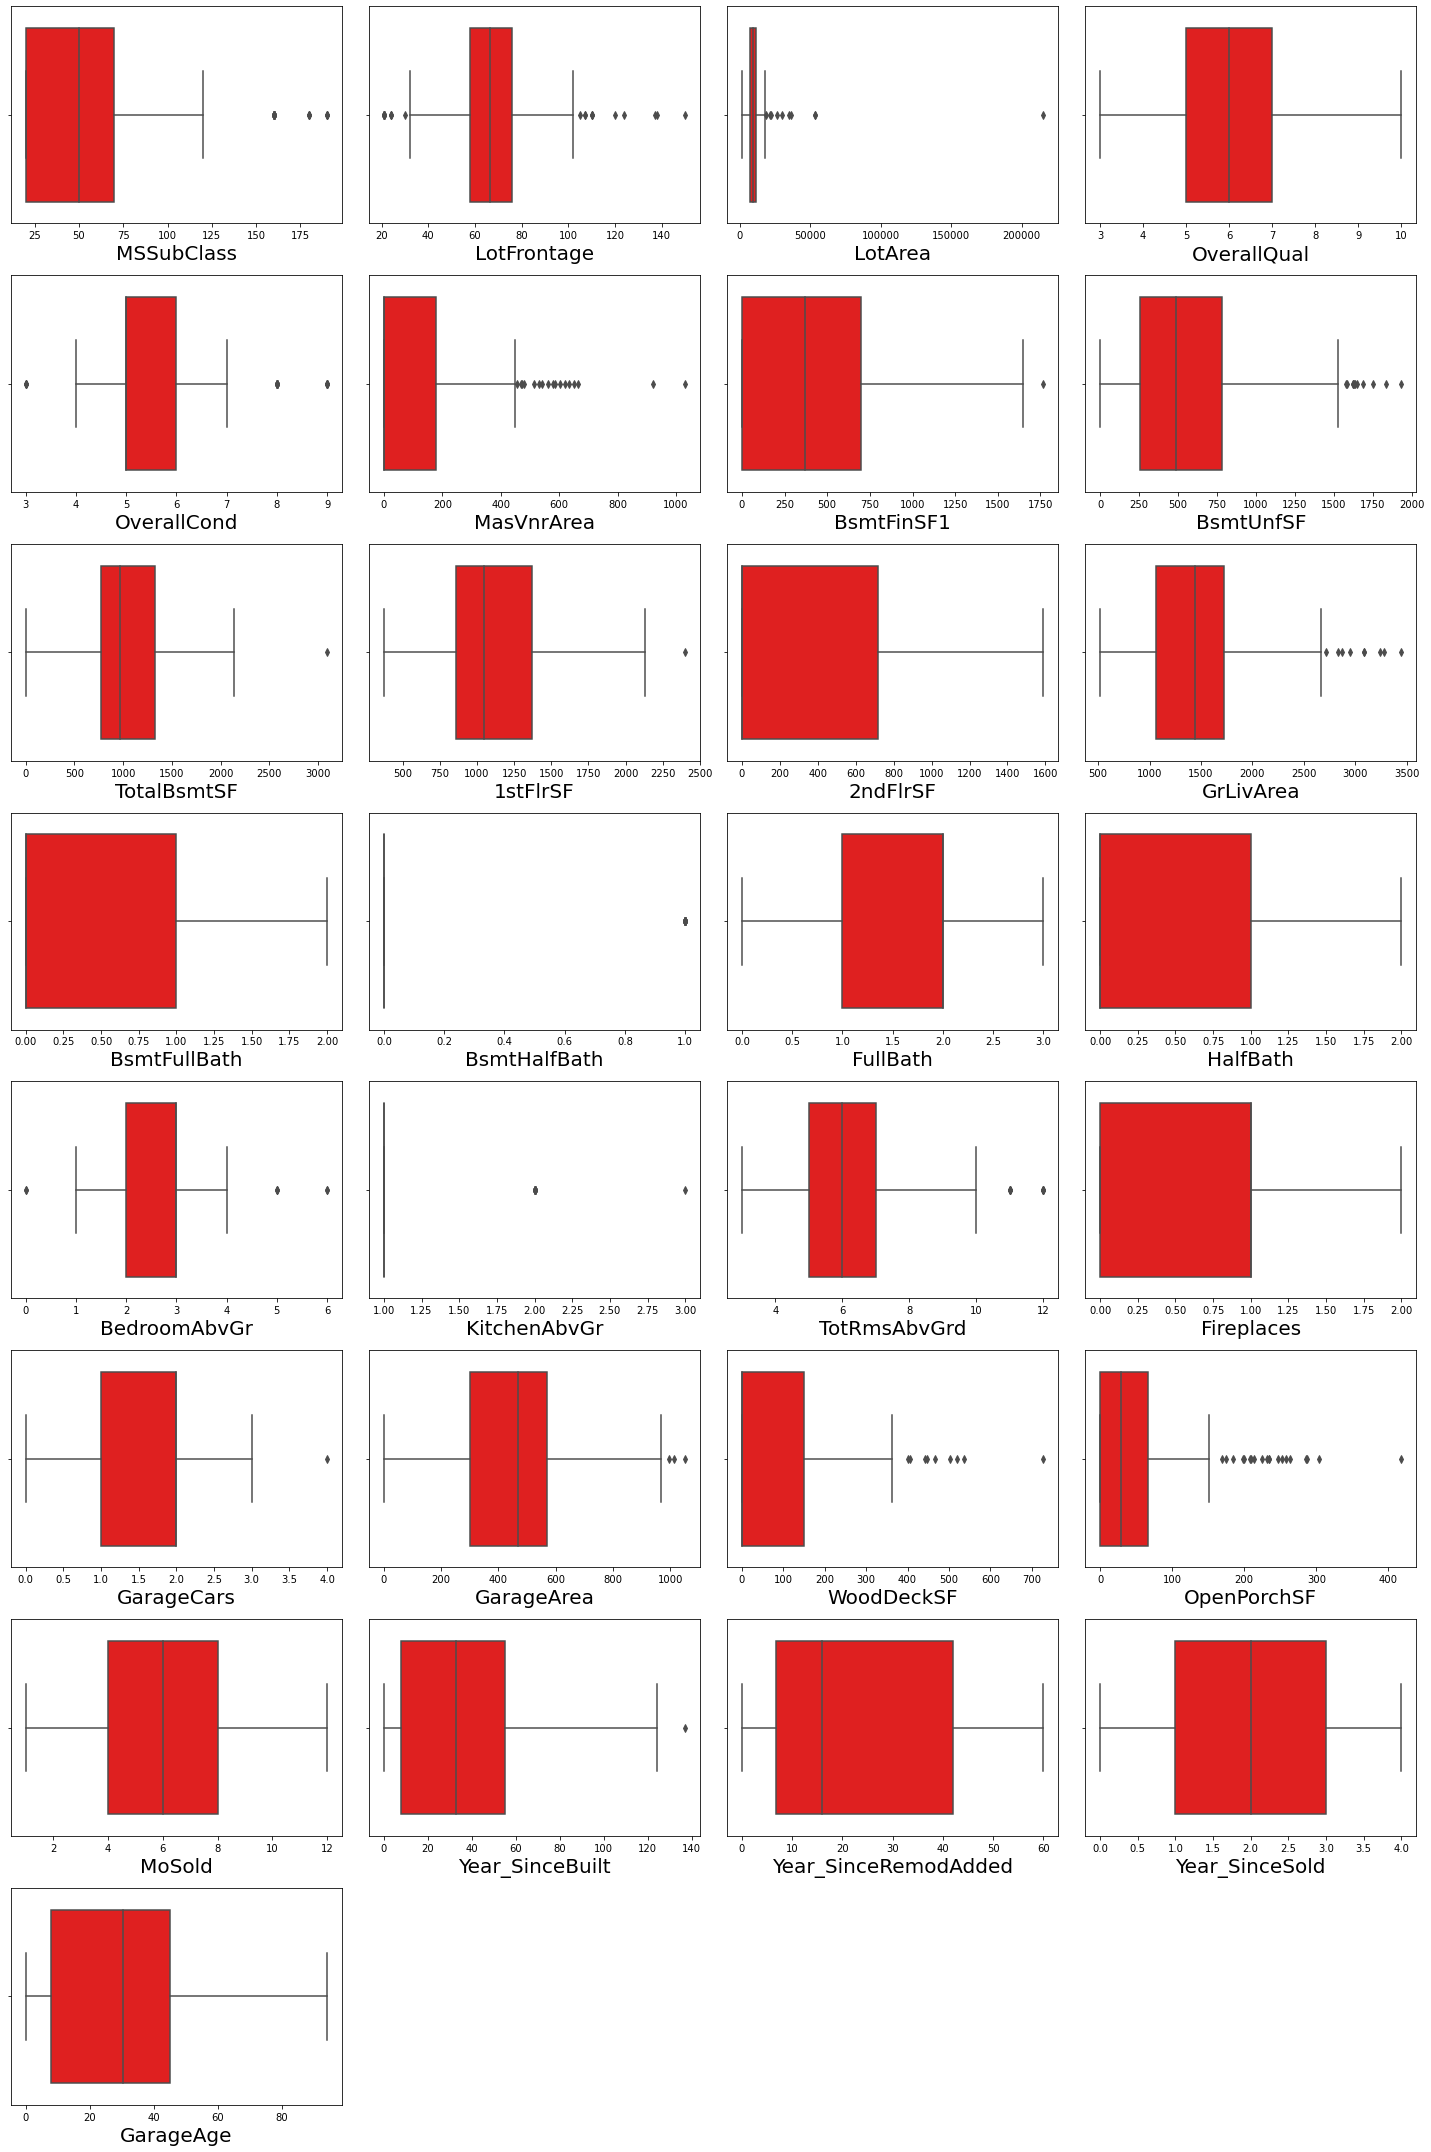

In [66]:
# for testing data

plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1
for column in numerical_columns1:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(dff[column],color='red')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

**Below are the columns with outliers**

* MSSubClass
* LotFrontage
* LotArea
* OverallCond
* MasVnrArea
* BsmtFinSF1
* BsmtUnfSF
* TotalBsmtSF
* 1stFlrSF
* GrLivArea
* BsmtHalfBath
* BedroomAbvGr
* KitchenAbvGr
* TotRmsAbvGrd
* GarageCars
* GarageArea
* WoodDeckSF
* OpenPorchSF
* Year_SinceBuilt

# Lets remove outliers now

In [67]:
#Features having outliers in train dataset
features=df[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','BsmtHalfBath','BedroomAbvGr','GarageArea','WoodDeckSF','OpenPorchSF']]


In [68]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         120       RL     70.98847     4928   Pave      IR1         Lvl   
1          20       RL     95.00000    15865   Pave      IR1         Lvl   
2          60       RL     92.00000     9920   Pave      IR1         Lvl   
3          20       RL    105.00000    11751   Pave      IR1         Lvl   
5          60       RL     58.00000    14054   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE     1Story   
1    Inside       Mod        NAmes       Norm       Norm     1Fam     1Story   
2   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam     2Story   
3    Inside       Gtl       NWAmes       Norm       Norm     1Fam     1Story   
5    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            6            5     Gable  CompShg     Plywood     Plywood   
1            8            6      Flat  Tar&Grv     Wd Sdng     Wd Sdng   
2            7            5     Gable  CompShg     MetalSd     MetalSd   
3            6            6       Hip  CompShg     Plywood     Plywood   
5            7            5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0       None         0.0        TA        TA     CBlock       Gd       TA   
1       None         0.0        Gd        Gd      PConc       TA       Gd   
2       None         0.0        Gd        TA      PConc       Gd       TA   
3    BrkFace       480.0        TA        TA     CBlock       Gd       TA   
5       None         0.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtUnfSF  TotalBsmtSF  \
0           No          ALQ         120          Unf        958         1078   
1           Gd          ALQ         351          Rec       1043         2217   
2           Av          GLQ         862          Unf        255         1117   
3           No          BLQ         705          Unf       1139         1844   
5           Av          Unf           0          Unf        879          879   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  \
0    GasA        TA          Y      SBrkr       958         0        958   
1    GasA        Ex          Y      SBrkr      2217         0       2217   
2    GasA        Ex          Y      SBrkr      1127       886       2013   
3    GasA        Ex          Y      SBrkr      1844         0       1844   
5    GasA        Ex          Y      SBrkr       879       984       1863   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             2             1   
1             1             0         2         0             4             1   
2             1             0         2         1             3             1   
3             0             0         2         0             3             1   
5             0             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          TA             5        Typ           1          TA     Attchd   
1          Gd             8        Typ           1          TA     Attchd   
2          TA             8        Typ           1          TA     Attchd   
3          TA             7        Typ           1          TA     Attchd   
5          Gd             9        Typ           1          Gd    BuiltIn   

  GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
0          RFn           2         440         TA         TA          Y   
1          Unf           2         621         TA         TA          Y   
2          Unf           2         455      

In [69]:
# checking shape of new train dataset
df_new.shape

(1002, 68)

In [70]:
#Checking shape of old train dataset
df.shape

(1168, 68)

In [71]:
# Data Loss calculation
Dataloss = (((1168-1002)/1168)*100)
Dataloss

14.212328767123289

We have data loss more than 10 % which is huge loss of data. Lets try with another outliers handling method

## Percentile Method:

In [72]:
for col in features:
    if df[col].dtypes != 'object':
        percentile = df[col].quantile([0.01,0.98]).values
        df[col][df[col]<=percentile[0]]=percentile[0]
        df[col][df[col]>=percentile[1]]=percentile[1]

In [74]:
# features having outliers in test dataset
features1=dff[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','GrLivArea','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','Year_SinceBuilt']]


In [75]:
# For test data

for col1 in features1:
    if dff[col1].dtypes != 'object':
        percentile = dff[col1].quantile([0.01,0.98]).values
        dff[col][dff[col]<=percentile[0]]=percentile[0]
        dff[col][dff[col]>=percentile[1]]=percentile[1]

## Skewness checking

In [76]:
# checking for skewness of train dataset
df.skew()

MSSubClass              1.422019
LotFrontage             0.188060
LotArea                 1.191912
OverallQual             0.175082
OverallCond             0.580714
MasVnrArea              1.873138
BsmtFinSF1              0.639523
BsmtUnfSF               0.777624
TotalBsmtSF             0.166773
1stFlrSF                0.645842
2ndFlrSF                0.717390
GrLivArea               0.592755
BsmtFullBath            0.355224
BsmtHalfBath            3.954345
FullBath                0.057809
HalfBath                0.656492
BedroomAbvGr           -0.145762
KitchenAbvGr            4.365259
TotRmsAbvGrd            0.644657
Fireplaces              0.671966
GarageCars             -0.358556
GarageArea             -0.135675
WoodDeckSF              1.053617
OpenPorchSF             1.513678
MoSold                  0.220979
SalePrice               1.953878
Year_SinceBuilt         0.579204
Year_SinceRemodAdded    0.495864
Year_SinceSold         -0.115765
GarageAge               0.662934
dtype: flo

**Below are the column whicha re havinf skewness**

* MSSubClass
* LotArea
* OverallCond
* MasVnrArea
* BsmtFinSF1
* BsmtUnfSF
* 1stFlrSF
* 2ndFlrSF
* GrLivArea
* BsmtHalfBath
* HalfBath
* KitchenAbvGr
* Fireplaces
* WoodDeckSF
* OpenPorchSF
* SalePrice
* GarageAge

In [77]:

# checking for skewness of test dataset
dff.skew()

MSSubClass               1.358597
LotFrontage              0.466813
LotArea                 12.781805
OverallQual              0.397312
OverallCond              1.209714
MasVnrArea               1.976804
BsmtFinSF1               0.739790
BsmtUnfSF                0.960708
TotalBsmtSF              0.519257
1stFlrSF                 0.692047
2ndFlrSF                 0.765511
GrLivArea                1.010586
BsmtFullBath             0.463685
BsmtHalfBath             3.544994
FullBath                -0.049800
HalfBath                 0.758892
BedroomAbvGr             0.075315
KitchenAbvGr             4.849432
TotRmsAbvGrd             0.805535
Fireplaces               0.540164
GarageCars              -0.280324
GarageArea               0.133547
WoodDeckSF               1.708221
OpenPorchSF              0.000000
MoSold                   0.186504
Year_SinceBuilt          0.755233
Year_SinceRemodAdded     0.535600
Year_SinceSold          -0.018412
GarageAge                0.683042
dtype: float64

# Skewed columns as per below

* MSSubClass
* LotArea
* OverallCond
* MasVnrArea
* BsmtFinSF1
* BsmtUnfSF
* 1stFlrSF
* 2ndFlrSF
* GrLivArea
* BsmtHalfBath
* HalfBath
* KitchenAbvGr
* TotRmsAbvGrd
* Fireplaces
* WoodDeckSF
* OpenPorchSF
* Year_SinceBuilt
* Year_SinceRemodAdded

In [79]:
# Creating a list of skewed features in train dataset
col1=['LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtHalfBath','HalfBath','KitchenAbvGr','Fireplaces','WoodDeckSF','OpenPorchSF']


## removing skewness with yeo-johnson

In [80]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [82]:
df[col1] = scaler.fit_transform(df[col1].values)

In [84]:
# checking skewness again in train dataset
df[col1].skew()

LotArea         0.077862
MasVnrArea      0.415092
BsmtFinSF1     -0.418554
BsmtUnfSF      -0.304290
1stFlrSF       -0.000731
2ndFlrSF        0.279883
GrLivArea      -0.005974
BsmtHalfBath    3.954345
HalfBath        0.498003
KitchenAbvGr   -2.370593
Fireplaces      0.084950
WoodDeckSF      0.110387
OpenPorchSF    -0.010092
dtype: float64

In [85]:
# Dropping unnecessary column
df = df.drop(["KitchenAbvGr"],axis=1)

Removing skeenwss from test data

In [86]:
#Creating a list of skewed features in test dataset
col2=['LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtHalfBath','HalfBath','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','WoodDeckSF','OpenPorchSF','Year_SinceBuilt','Year_SinceRemodAdded']


In [87]:
dff[col2] = scaler.fit_transform(dff[col2].values)

In [89]:
# checking skewness again in test dataset
dff[col2].skew()

LotArea                 0.003111
MasVnrArea              0.363253
BsmtFinSF1             -0.441605
BsmtUnfSF              -0.232099
1stFlrSF               -0.000548
2ndFlrSF                0.284246
GrLivArea              -0.000307
BsmtHalfBath            3.544994
HalfBath                0.621093
KitchenAbvGr            0.000000
TotRmsAbvGrd           -0.000469
Fireplaces              0.076669
WoodDeckSF              0.210102
OpenPorchSF             0.000000
Year_SinceBuilt        -0.147007
Year_SinceRemodAdded   -0.081089
dtype: float64

In [90]:
# Dropping unnecessary column
dff = dff.drop(["KitchenAbvGr"],axis=1)

## Ordinal Encoding

In [91]:
# Replacing ratings with suitable numbers in required columns in train dataset
column = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']
for i in column:
    df[i] = df[i].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})

In [92]:
# Replacing ratings with suitable numbers in required columns in test dataset
column = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']
for i in column:
    dff[i] = dff[i].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})

In [93]:
# Ordinal encoding for train dataset
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

In [94]:
# Ordinal encoding for test dataset
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in dff.columns:
    if dff[i].dtypes=='object':
        dff[i]=OE.fit_transform(dff[i].values.reshape(-1,1))

We have encode our data in numerical format

# Correlation

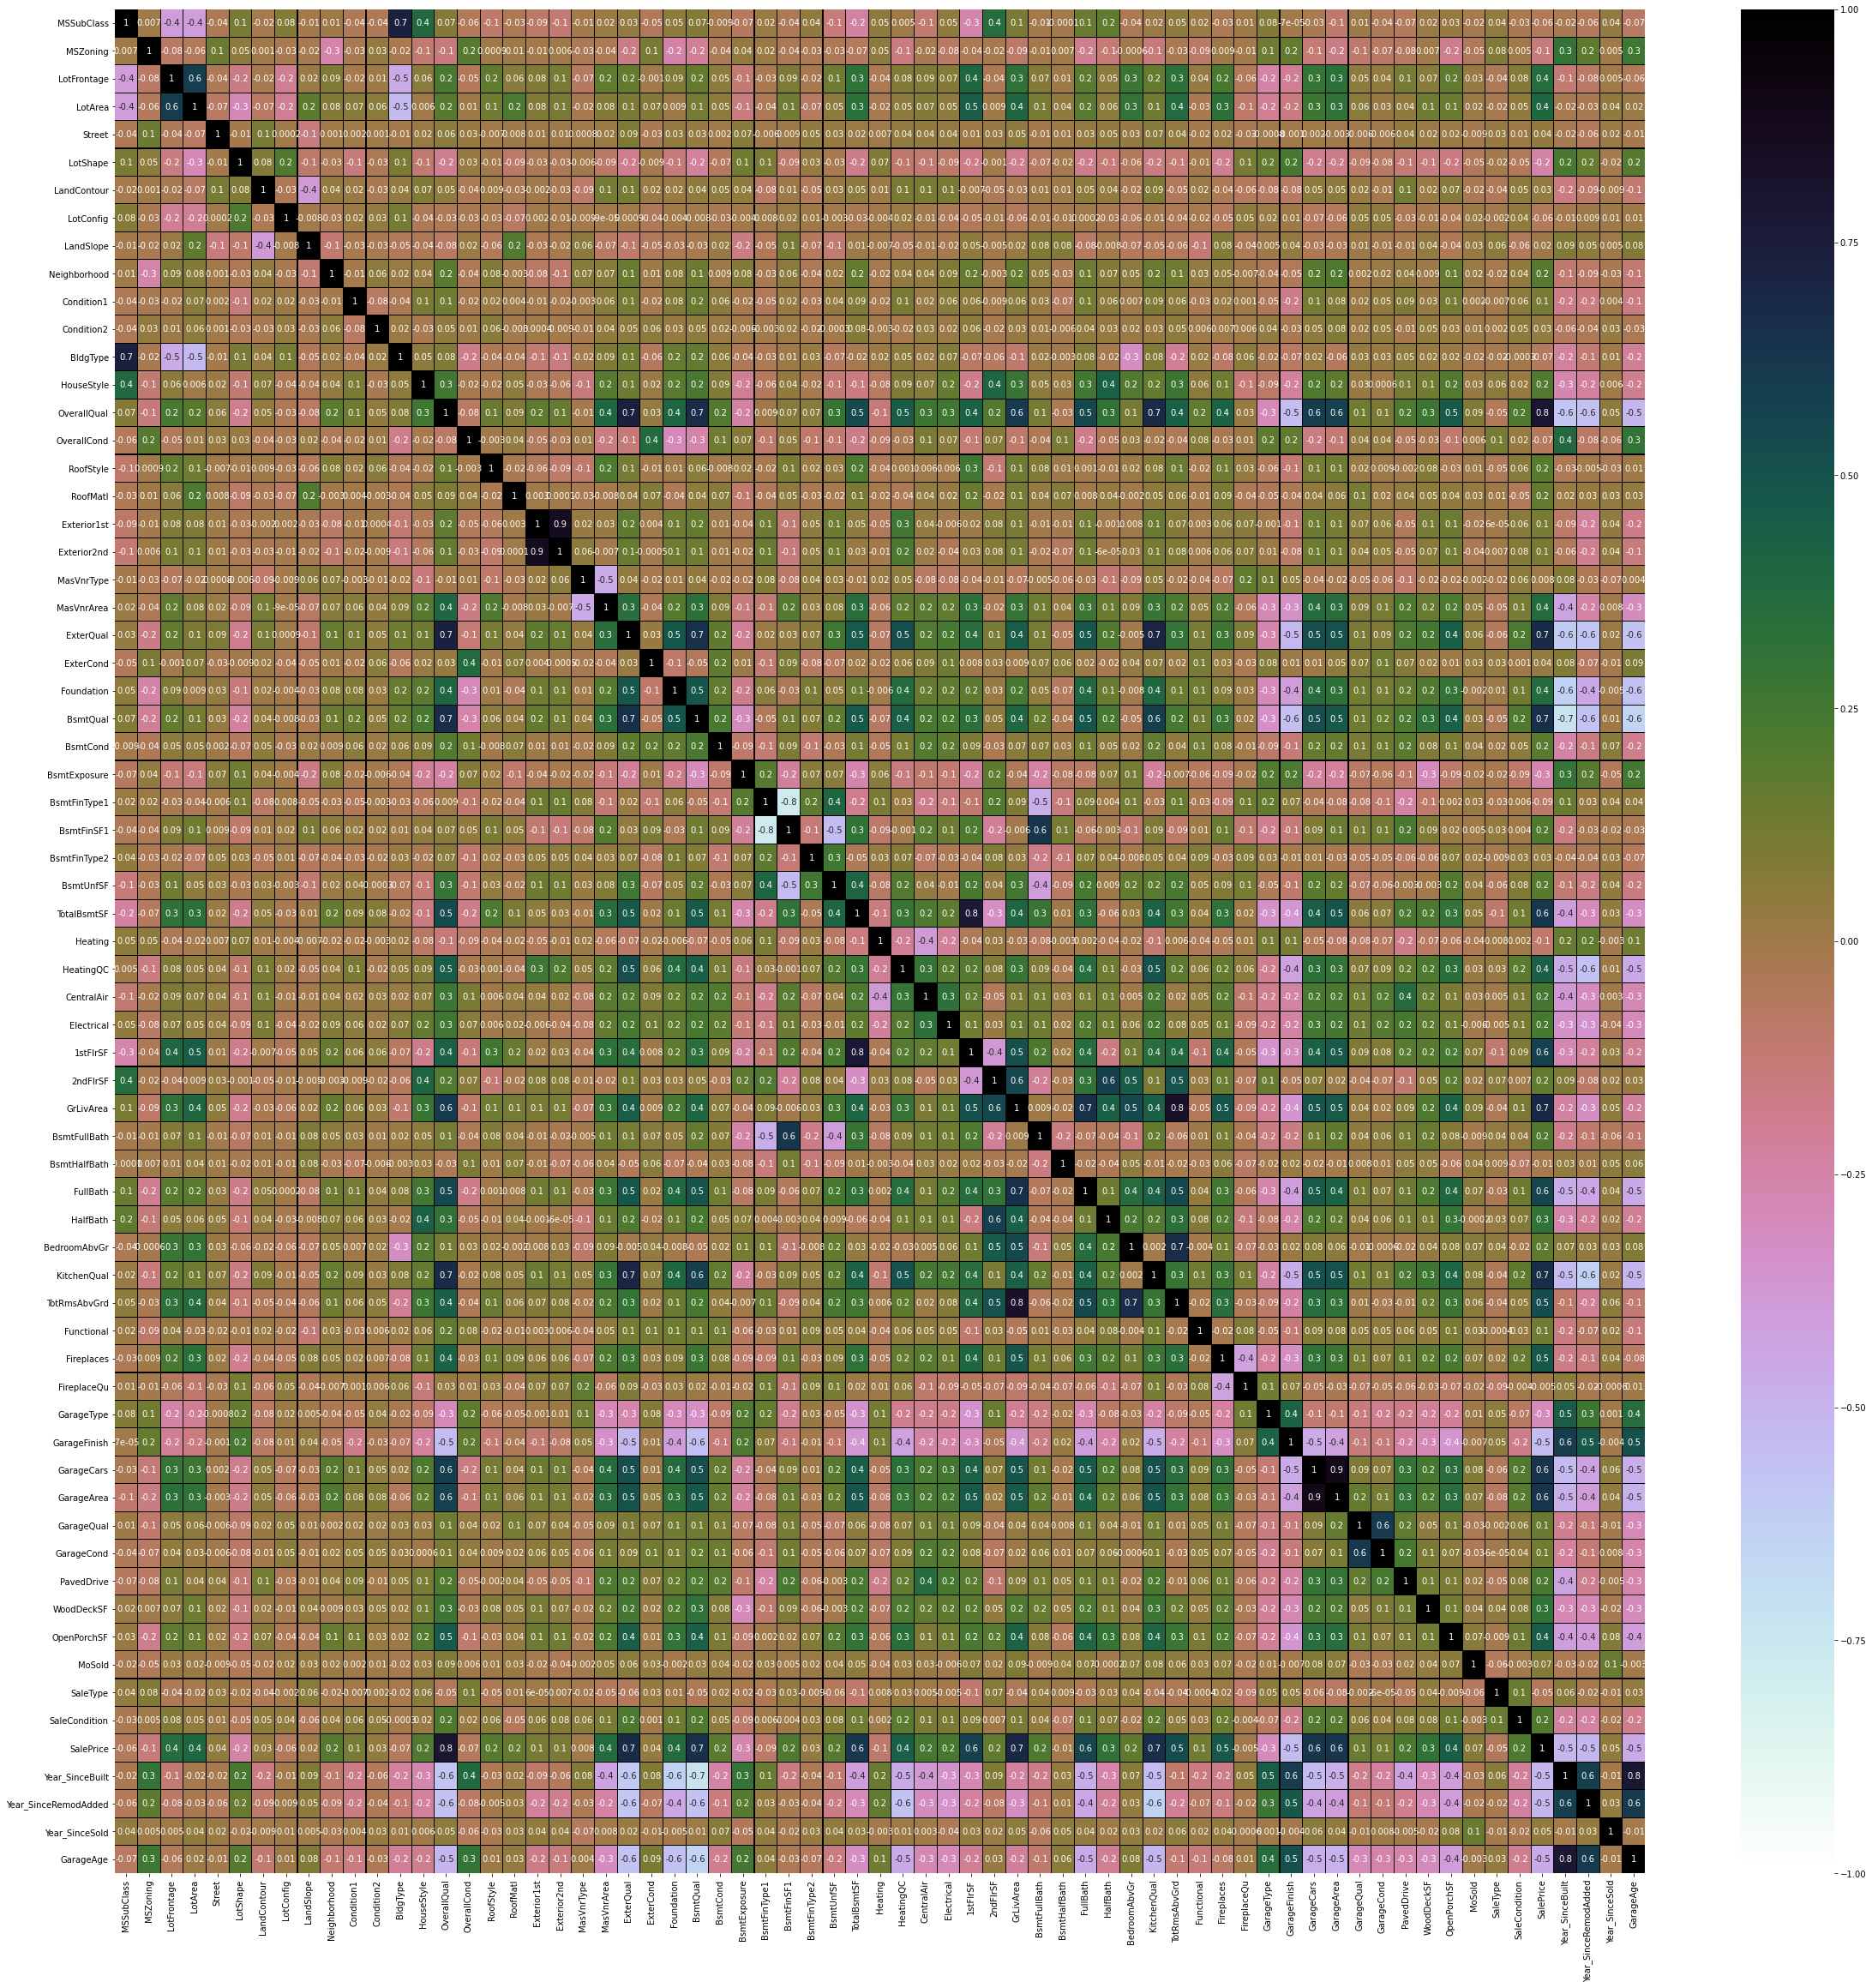

In [95]:
# visualizing the correlation matrix by plotting heat map for train dataset.
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="cubehelix_r")
plt.yticks(rotation=0);


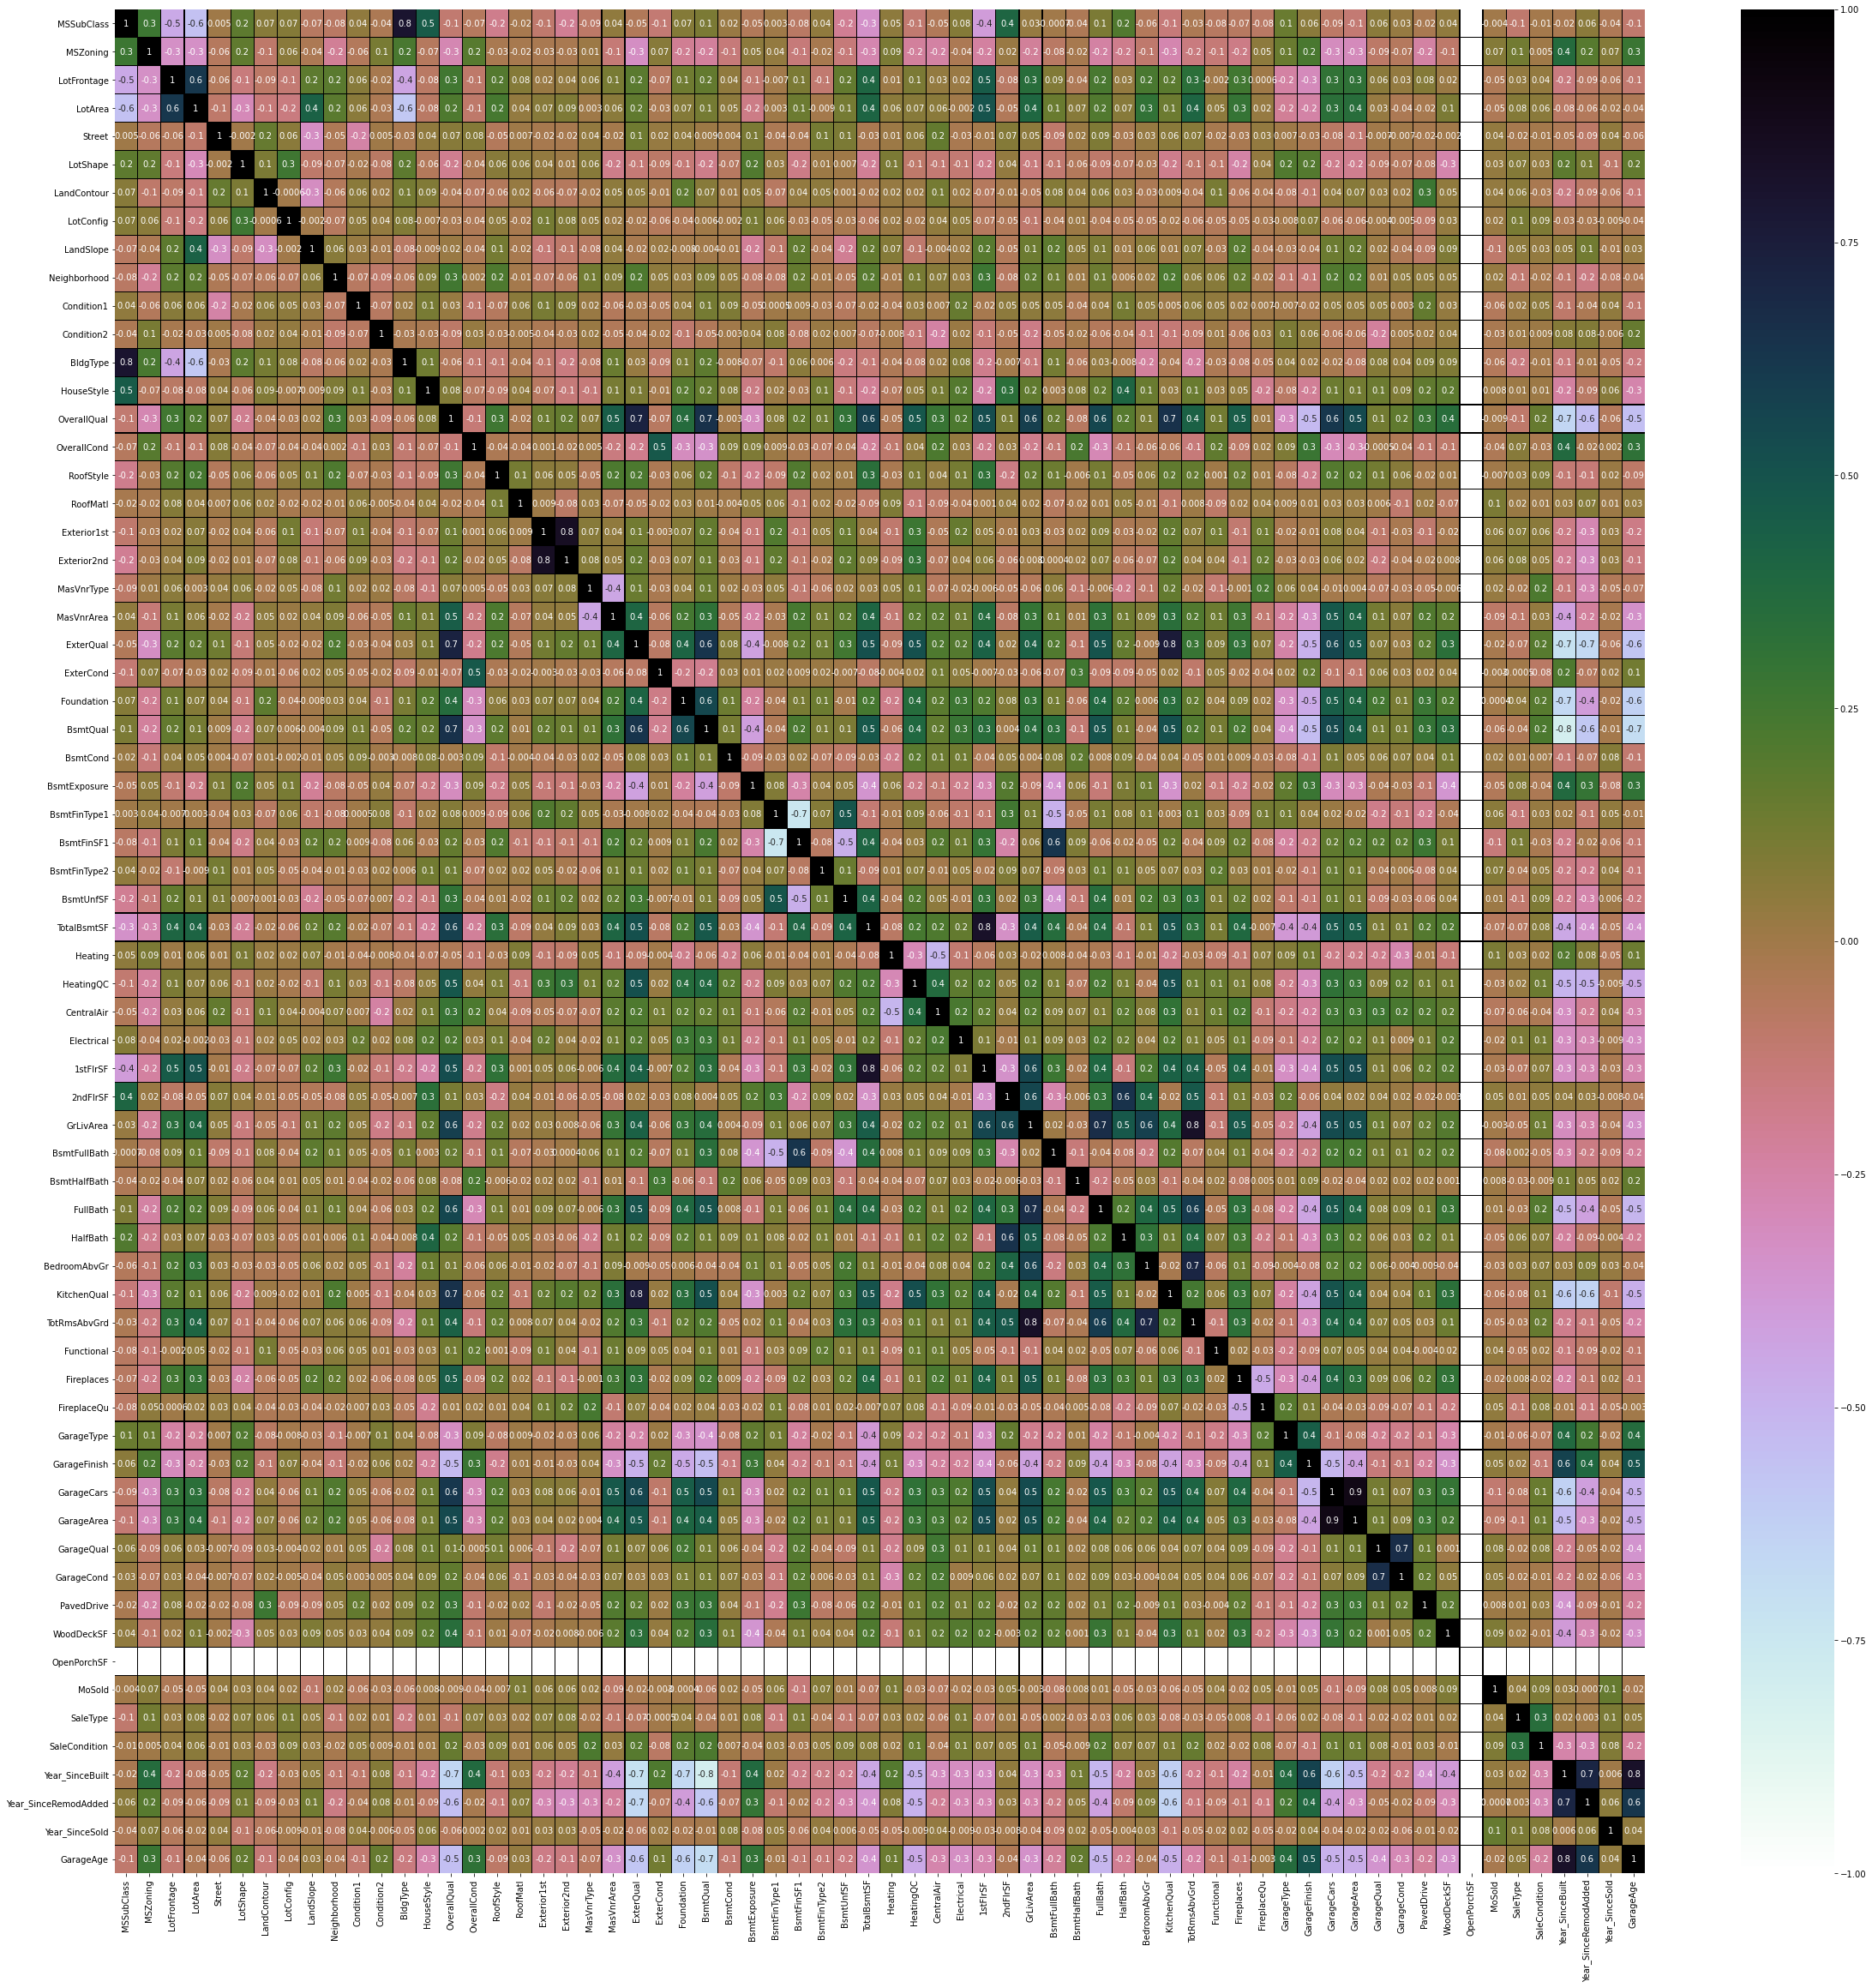

In [96]:
# Visualizing the correlation matrix by plotting heat map for test dataset.
plt.figure(figsize=(40,40))
sns.heatmap(dff.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="cubehelix_r")
plt.yticks(rotation=0);

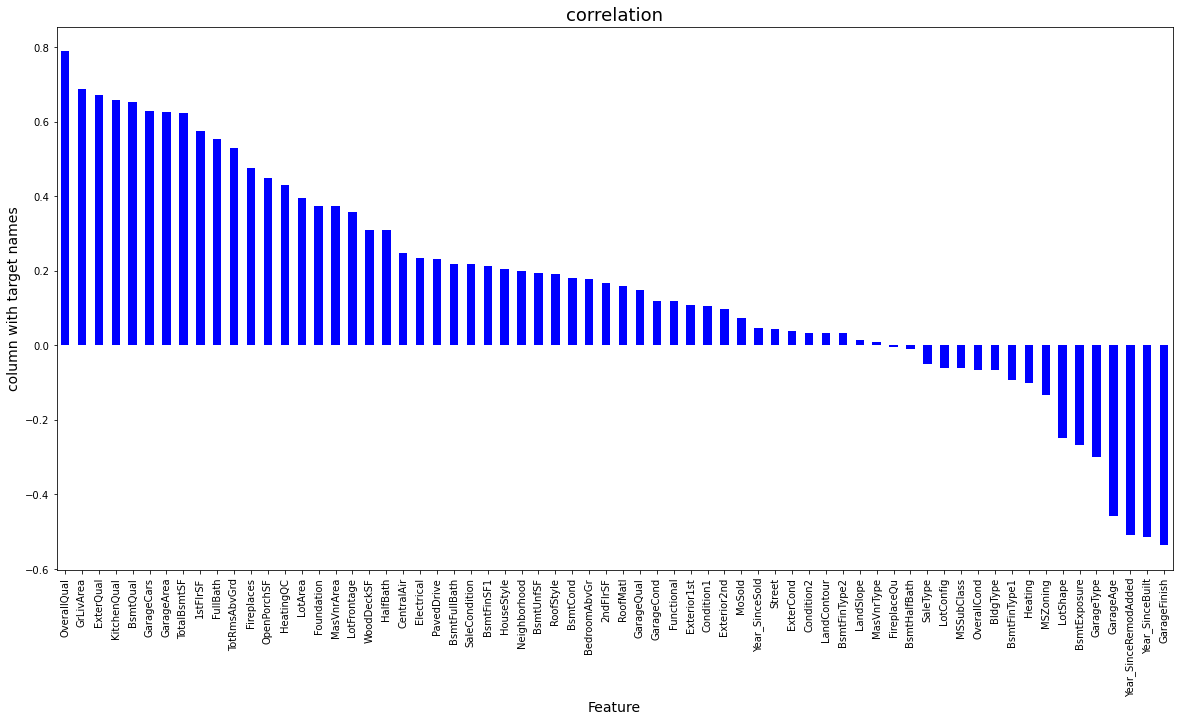

In [97]:
plt.figure(figsize=(20,10))
df.corr()['SalePrice'].sort_values(ascending=False).drop(['SalePrice']).plot(kind='bar',color='b')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

We can see that nearby 70% coulumns are aving postive correlation with target and rest all have nagetive correaltion with target 

## Our data is ready now and we can move forward

# Defining x and Y

In [98]:
x = df.drop("SalePrice",axis=1)
y = df["SalePrice"]


In [99]:
x.shape

(1168, 66)

In [100]:
y.shape

(1168,)

## Scaling the train data using standard scaler:

In [101]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [102]:
X.head()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0    1.508301 -0.021646     0.039092 -1.306083  0.058621 -1.373107   
1   -0.877042 -0.021646     1.321126  1.356458  0.058621 -1.373107   
2    0.077095 -0.021646     1.160948  0.113089  0.058621 -1.373107   
3   -0.877042 -0.021646     1.855050  0.530989  0.058621 -1.373107   
4   -0.877042 -0.021646     0.039092  1.497522  0.058621 -1.373107   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0     0.318473   0.606420  -0.226126      0.142224   -0.037339   -0.023979   
1     0.318473   0.606420   3.295414     -0.024227   -0.037339   -0.023979   
2     0.318473  -1.220661  -0.226126      0.475125   -0.037339   -0.023979   
3     0.318473   0.606420  -0.226126      0.308675   -0.037339   -0.023979   
4     0.318473  -0.611634  -0.226126      0.308675   -0.037339   -0.023979   

   BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  \
0  2.985495   -0.549930    -0.075169    -0.530217  -0.483544 -0.134573   
1 -0.403288   -0.549930     1.364138     0.359572  -1.685203  6.090408   
2 -0.403288    1.030838     0.644484    -0.530217  -0.483544 -0.134573   
3 -0.403288   -0.549930    -0.075169     0.359572   1.919773 -0.134573   
4 -0.403288   -0.549930    -0.075169     1.249361  -0.483544 -0.134573   

   Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0    -0.212927    -0.104890    0.395209   -0.822896  -0.700004  -0.223988   
1     1.079014     1.050880    0.395209   -0.822896   1.032209   2.589114   
2    -0.535912    -0.682775    0.395209   -0.822896   1.032209  -0.223988   
3    -0.212927    -0.104890   -1.241686    1.385487  -0.700004  -0.223988   
4    -1.504868    -1.549602    2.032104    1.140684   1.032209  -0.223988   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0   -0.557836  0.647378 -0.037507      0.635539     -1.523529   -0.117054   
1    0.852451 -0.832343  3.332324     -1.113129     -1.523529    0.395541   
2    0.852451  0.647378 -0.037507     -1.987463     -0.434828    0.934402   
3   -0.557836  0.647378 -0.037507      0.635539     -0.979178    0.803940   
4   -0.557836  0.647378 -0.037507      0.635539     -1.523529    1.189724   

   BsmtFinType2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  \
0      0.310141   0.916764     0.067300 -0.11909  -1.178317    0.267506   
1     -0.771186   1.042594     2.453434 -0.11909   0.903792    0.267506   
2      0.310141  -0.510359     0.165553 -0.11909   0.903792    0.267506   
3      0.310141   1.178365     1.997087 -0.11909   0.903792    0.267506   
4      0.310141  -0.230032     1.387415 -0.11909  -0.137262    0.267506   

   Electrical  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0    0.299036 -0.481887 -0.871789  -1.281768     -0.838227     -0.238775   
1    0.299036  2.082190 -0.871789   1.377184      1.192995     -0.238775   
2    0.299036  0.048689  1.177246   1.060650      1.192995     -0.238775   
3    0.299036  1.665038 -0.871789   0.775546     -0.838227     -0.238775   
4    0.299036  1.201931 -0.871789   0.322952     -0.838227      4.188040   

   FullBath  HalfBath  BedroomAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0  0.793082 -0.782707     -1.144966    -0.788838     -0.965583    0.261146   
1  0.793082 -0.782707      1.475072     0.716657      0.911999    0.261146   
2  0.793082  1.268421      0.165053    -0.788838      0.911999    0.261146   
3  0.793082 -0.782707      0.165053    -0.788838      0.286138    0.261146   
4  0.793082 -0.782707      0.165053     0.716657      0.911999    0.261146   

   Fireplaces  FireplaceQu  GarageType  GarageFinish  GarageCars  GarageArea  \
0    0.777879    -1.163409   -0.693653     -0.288773     0.29985   -0.163806   
1    0.777879    -1.163409   -0.693653      0.946709     0.29985    0.717359   
2    0.777879    -1.163409   -0.693653      0.946709     0.29985   -0.090782   
3    0.777879    -1.163409   -0.693653     -0

## Scaling the test data using standard scaler

In [103]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_1 = pd.DataFrame(scaler.fit_transform(dff), columns=dff.columns)

In [106]:
X_1.shape

(292, 66)

## Checking for multicolinearity issue in train dataset using VIF

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

vif_Features              Features
0       5.093250            MSSubClass
1       1.356357              MSZoning
2       2.036100           LotFrontage
3       2.645424               LotArea
4       1.107727                Street
5       1.288892              LotShape
6       1.336911           LandContour
7       1.151456             LotConfig
8       1.461325             LandSlope
9       1.255489          Neighborhood
10      1.146316            Condition1
11      1.086460            Condition2
12      5.037705              BldgType
13      2.340086            HouseStyle
14      4.190570           OverallQual
15      2.119268           OverallCond
16      1.258403             RoofStyle
17      1.197352              RoofMatl
18      4.311945           Exterior1st
19      4.323531           Exterior2nd
20      1.542480            MasVnrType
21      1.982516            MasVnrArea
22      3.276437             ExterQual
23      1.315560             ExterCond
24      2.119233            Foundation
25      3.244953              BsmtQual
26      1.252565              BsmtCond
27      1.564053          BsmtExposure
28      3.033460          BsmtFinType1
29      6.213143            BsmtFinSF1
30      1.340639          BsmtFinType2
31      4.575481             BsmtUnfSF
32      7.549402           TotalBsmtSF
33      1.322687               Heating
34      1.889108             HeatingQC
35      1.697958            CentralAir
36      1.378540            Electrical
37     13.055582              1stFlrSF
38     12.680391              2ndFlrSF
39     19.618638             GrLivArea
40      2.237983          BsmtFullBath
41      1.228506          BsmtHalfBath
42      3.118382              FullBath
43      2.491455              HalfBath
44      2.679456          BedroomAbvGr
45      2.772798           KitchenQual
46      4.581848          TotRmsAbvGrd
47      1.238171            Functional
48      2.186128            Fireplaces
49      1.551971           FireplaceQu
50      1.776246            GarageType
51      2.077976          GarageFinish
52      6.188816            GarageCars
53      6.478492            GarageArea
54      1.858669            GarageQual
55      1.824798            GarageCond
56      1.548704            PavedDrive
57      1.327511            WoodDeckSF
58      1.605707           OpenPorchSF
59      1.084174                MoSold
60      1.117479              SaleType
61      1.186947         SaleCondition
62      7.717894       Year_SinceBuilt
63      3.092263  Year_SinceRemodAdded
64      1.087883        Year_SinceSold
65      4.002911             GarageAge

In [108]:
# Droping high VIF columns
X = X.drop(["GrLivArea"],axis=1)

In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

vif_Features              Features
0       5.086826            MSSubClass
1       1.355687              MSZoning
2       2.031739           LotFrontage
3       2.643804               LotArea
4       1.101570                Street
5       1.287431              LotShape
6       1.336283           LandContour
7       1.151225             LotConfig
8       1.456064             LandSlope
9       1.252611          Neighborhood
10      1.145516            Condition1
11      1.083847            Condition2
12      5.021554              BldgType
13      2.294745            HouseStyle
14      4.173592           OverallQual
15      2.112760           OverallCond
16      1.256445             RoofStyle
17      1.195361              RoofMatl
18      4.308002           Exterior1st
19      4.315466           Exterior2nd
20      1.534392            MasVnrType
21      1.982048            MasVnrArea
22      3.276390             ExterQual
23      1.311104             ExterCond
24      2.097885            Foundation
25      3.239886              BsmtQual
26      1.252542              BsmtCond
27      1.561280          BsmtExposure
28      3.033386          BsmtFinType1
29      6.211366            BsmtFinSF1
30      1.339725          BsmtFinType2
31      4.574865             BsmtUnfSF
32      7.509023           TotalBsmtSF
33      1.320257               Heating
34      1.884648             HeatingQC
35      1.691584            CentralAir
36      1.377826            Electrical
37      6.422458              1stFlrSF
38      5.698870              2ndFlrSF
39      2.237754          BsmtFullBath
40      1.227206          BsmtHalfBath
41      2.944251              FullBath
42      2.397731              HalfBath
43      2.637482          BedroomAbvGr
44      2.772160           KitchenQual
45      4.273309          TotRmsAbvGrd
46      1.231095            Functional
47      2.148708            Fireplaces
48      1.542988           FireplaceQu
49      1.776235            GarageType
50      2.070200          GarageFinish
51      6.186105            GarageCars
52      6.439049            GarageArea
53      1.852192            GarageQual
54      1.823510            GarageCond
55      1.547534            PavedDrive
56      1.326397            WoodDeckSF
57      1.595574           OpenPorchSF
58      1.083199                MoSold
59      1.115731              SaleType
60      1.186606         SaleCondition
61      7.611941       Year_SinceBuilt
62      3.089185  Year_SinceRemodAdded
63      1.087537        Year_SinceSold
64      4.001722             GarageAge

## Checking for multicolinearity issue in test dataset using VIF

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

vif_Features              Features
0      13.626586            MSSubClass
1       1.884112              MSZoning
2       2.172429           LotFrontage
3       4.421420               LotArea
4       1.527782                Street
5       1.654131              LotShape
6       1.582356           LandContour
7       1.346311             LotConfig
8       2.232301             LandSlope
9       1.543010          Neighborhood
10      1.341060            Condition1
11      1.485808            Condition2
12      8.534130              BldgType
13      3.634130            HouseStyle
14      5.617097           OverallQual
15      3.021828           OverallCond
16      1.604300             RoofStyle
17      1.270831              RoofMatl
18      4.987569           Exterior1st
19      5.252024           Exterior2nd
20      2.260134            MasVnrType
21      2.573780            MasVnrArea
22      4.799285             ExterQual
23      1.754237             ExterCond
24      2.848260            Foundation
25      4.574668              BsmtQual
26      1.366720              BsmtCond
27      2.184917          BsmtExposure
28      3.356137          BsmtFinType1
29      8.033539            BsmtFinSF1
30      1.628040          BsmtFinType2
31      6.749260             BsmtUnfSF
32     12.793646           TotalBsmtSF
33      2.144115               Heating
34      2.302395             HeatingQC
35      2.765113            CentralAir
36      1.606110            Electrical
37     26.599600              1stFlrSF
38     27.614482              2ndFlrSF
39     44.856773             GrLivArea
40      2.746759          BsmtFullBath
41      1.551028          BsmtHalfBath
42      4.005942              FullBath
43      3.324055              HalfBath
44      3.146202          BedroomAbvGr
45      3.703590           KitchenQual
46      5.737238          TotRmsAbvGrd
47      1.673681            Functional
48      3.012969            Fireplaces
49      1.824189           FireplaceQu
50      2.041550            GarageType
51      2.328987          GarageFinish
52      9.756964            GarageCars
53      7.947833            GarageArea
54      2.932611            GarageQual
55      2.705809            GarageCond
56      2.041878            PavedDrive
57      1.771421            WoodDeckSF
58           NaN           OpenPorchSF
59      1.350861                MoSold
60      1.625591              SaleType
61      1.675046         SaleCondition
62     14.830348       Year_SinceBuilt
63      4.648797  Year_SinceRemodAdded
64      1.234314        Year_SinceSold
65      5.871897             GarageAge

In [111]:
# Droping high VIF columns
X_1 = X_1.drop(["GrLivArea"],axis=1)

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

vif_Features              Features
0      13.549671            MSSubClass
1       1.884097              MSZoning
2       2.153265           LotFrontage
3       4.420995               LotArea
4       1.523600                Street
5       1.653437              LotShape
6       1.582307           LandContour
7       1.341148             LotConfig
8       2.231504             LandSlope
9       1.543010          Neighborhood
10      1.339021            Condition1
11      1.480678            Condition2
12      8.379374              BldgType
13      3.267328            HouseStyle
14      5.561698           OverallQual
15      3.000873           OverallCond
16      1.598573             RoofStyle
17      1.265276              RoofMatl
18      4.980940           Exterior1st
19      5.198620           Exterior2nd
20      2.256127            MasVnrType
21      2.572250            MasVnrArea
22      4.793886             ExterQual
23      1.751759             ExterCond
24      2.806363            Foundation
25      4.572268              BsmtQual
26      1.366627              BsmtCond
27      2.184031          BsmtExposure
28      3.338550          BsmtFinType1
29      8.027101            BsmtFinSF1
30      1.621135          BsmtFinType2
31      6.671438             BsmtUnfSF
32     12.412036           TotalBsmtSF
33      2.109692               Heating
34      2.300893             HeatingQC
35      2.764548            CentralAir
36      1.605655            Electrical
37      8.679532              1stFlrSF
38      7.818566              2ndFlrSF
39      2.739138          BsmtFullBath
40      1.550745          BsmtHalfBath
41      3.830519              FullBath
42      3.203928              HalfBath
43      3.090992          BedroomAbvGr
44      3.700177           KitchenQual
45      5.481700          TotRmsAbvGrd
46      1.653628            Functional
47      2.959369            Fireplaces
48      1.804014           FireplaceQu
49      2.038678            GarageType
50      2.327933          GarageFinish
51      9.731516            GarageCars
52      7.905036            GarageArea
53      2.890187            GarageQual
54      2.689422            GarageCond
55      2.038886            PavedDrive
56      1.769715            WoodDeckSF
57           NaN           OpenPorchSF
58      1.342317                MoSold
59      1.620613              SaleType
60      1.654558         SaleCondition
61     14.535096       Year_SinceBuilt
62      4.637267  Year_SinceRemodAdded
63      1.233109        Year_SinceSold
64      5.871092             GarageAge

Our data is ready now

## Lets find best random staet

In [113]:
# importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [114]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8982288790064739  on Random_state  50


We found our best random state which is 50 and we are getting 89% accuracy with this random satet

In [115]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=50)

In [117]:
# importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

# RandomForestRegressor

In [118]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(RFR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 90.48869060743056
mean_squared_error: 572490073.5776772
mean_absolute_error: 16489.206752136753
root_mean_squared_error: 23926.764795468636

Cross validation score : 83.13980165249832

R2_Score - Cross Validation Score : 7.348888954932235


# ExtraTreesRegressor

In [119]:
ETR=ExtraTreesRegressor()
ETR.fit(X_train,y_train)
pred=ETR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(ETR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 88.74712101172136
mean_squared_error: 677315946.1086572
mean_absolute_error: 17181.10772079772
root_mean_squared_error: 26025.294352007957

Cross validation score : 84.08078742343974

R2_Score - Cross Validation Score : 4.666333588281617


# GradientBoostingRegressor

In [120]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(GBR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 91.3707297413273
mean_squared_error: 519399733.66533804
mean_absolute_error: 15394.542524123563
root_mean_squared_error: 22790.342991393045

Cross validation score : 82.46158952618515

R2_Score - Cross Validation Score : 8.909140215142145


# DecisionTreeRegressor

In [121]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(DTR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 67.25296105975163
mean_squared_error: 1971059289.3760684
mean_absolute_error: 29408.91452991453
root_mean_squared_error: 44396.61348995065

Cross validation score : 62.644519590708235

R2_Score - Cross Validation Score : 4.608441469043392


Hyper parameter tunning for best model which is ExtraTreesRegressor as there is low difference between accuracy score and corss validation

## Hyper parameter tunning

In [122]:
# importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [123]:
parameter = {'n_estimators':[10,100,1000],
             'criterion':['squared_error','mse','absolute_error','mae'],
             'min_samples_split': [1,2,3,4],
             'max_features':['auto','sqrt','log2'],
             'n_jobs':[-2,-1,1,2]}

In [124]:
GCV=GridSearchCV(ExtraTreesRegressor(),parameter,cv=5)

In [125]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'mse', 'absolute_error',
                                       'mae'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [10, 100, 1000],
                         'n_jobs': [-2, -1, 1, 2]})

In [126]:
GCV.best_params_

{'criterion': 'mse',
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 100,
 'n_jobs': 1}

In [127]:
Best_mod=ExtraTreesRegressor(criterion='mae',max_features='sqrt',min_samples_split=2,n_estimators=100,n_jobs=-2)
Best_mod.fit(X_train,y_train)
pred=Best_mod.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 88.67339875622513
mean_squared_error: 681753322.4709828
mean_absolute_error: 17045.901994301992
RMSE value: 26110.406401873235


# Saving the model:

In [128]:
# Saving the model using .pkl
import joblib
joblib.dump(Best_mod,"House_PricePrediction.pkl")

['House_PricePrediction.pkl']

## Predicating Price for test dataset using best model saved

In [129]:
# Loading the saved model
model=joblib.load("House_PricePrediction.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([136762.16, 180206.06, 115878.11, 227109.9 , 137573.17,  99927.35,
        97545.  , 376514.9 , 263212.85, 208886.05, 285506.56, 136302.93,
       198890.91, 220415.  , 165489.  , 209925.42, 170518.99, 210229.66,
       159718.07, 155660.61, 167612.15, 362974.11, 204513.  , 231421.05,
       118977.99, 136077.  , 164544.87, 230247.81, 124772.58, 140107.5 ,
       320529.12, 187246.63, 132959.4 , 201898.36, 102538.51, 200526.45,
       159979.58,  91372.59, 158848.37, 205102.74, 220486.83, 214418.24,
       148490.6 , 181768.  , 189592.32, 201345.07, 261276.76, 203457.8 ,
       183636.32, 177230.92, 168117.5 ,  72616.65, 176339.  , 121736.48,
       120991.63, 263350.6 , 291619.13, 150209.  ,  97190.05, 221170.44,
       104375.63,  94957.64, 181442.59, 371601.37, 153976.  , 210377.61,
       306943.38,  85756.76, 152401.8 , 164386.47, 196855.47, 202666.86,
        97852.67, 209645.15, 170595.66, 245307.66, 136324.25, 202498.53,
       256123.95, 140057.05, 467782.45, 125627.28, 

In [130]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

0          1          2         3          4         5    \
Predicted  136762.16  180206.06  115878.11  227109.9  137573.17  99927.35   
Actual     137000.00  168500.00  115000.00  280000.0  140000.00  76000.00   

               6         7          8          9          10         11   \
Predicted  97545.0  376514.9  263212.85  208886.05  285506.56  136302.93   
Actual     88000.0  335000.0  222000.00  227000.00  286000.00  132250.00   

                 12        13        14         15         16         17   \
Predicted  198890.91  220415.0  165489.0  209925.42  170518.99  210229.66   
Actual     189000.00  193500.0  140000.0  198900.00  157500.00  226700.00   

                 18         19         20         21        22         23   \
Predicted  159718.07  155660.61  167612.15  362974.11  204513.0  231421.05   
Actual     164900.00  168000.00  173733.00  320000.00  171750.0  254000.00   

                 24        25         26         27         28        29   \
Predicted  118977.99  136077.0  164544.87  230247.81  124772.58  140107.5   
Actual      82500.00  133000.0  143000.00  232000.00  126175.00  127000.0   

                 30         31        32         33         34         35   \
Predicted  320529.12  187246.63  132959.4  201898.36  102538.51  200526.45   
Actual     276000.00  185000.00  119500.0  190000.00   82000.00  170000.00   

                 36        37         38         39         40         41   \
Predicted  159979.58  91372.59  158848.37  205102.74  220486.83  214418.24   
Actual     146000.00  37900.00  168500.00  203000.00  227875.00  200000.00   

                42        43         44         45         46        47   \
Predicted  148490.6  181768.0  189592.32  201345.07  261276.76  203457.8   
Actual     133000.0  157500.0  234000.00  190000.00  259000.00  178000.0   

                 48         49        50        51        52         53   \
Predicted  183636.32  177230.92  168117.5  72616.65  176339.0  121736.48   
Actual     159000.00  174000.00  176000.0  39300.00  175000.0  124500.00   

                 54        55         56        57        58         59   \
Predicted  120991.63  263350.6  291619.13  150209.0  97190.05  221170.44   
Actual     120000.00  275000.0  348000.00  153500.0  92000.00  214000.00   

                 60        61         62         63        64         65   \
Predicted  104375.63  94957.64  181442.59  371601.37  153976.0  210377.61   
Actual     112000.00  90000.00  169990.00  310000.00  135000.0  191000.00   

                 66        67        68         69         70         71   \
Predicted  306943.38  85756.76  152401.8  164386.47  196855.47  202666.86   
Actual     275000.00  60000.00  156000.0  169000.00  194000.00  204900.00   

                 72         73         74         75         76         77   \
Predicted   97852.67  209645.15  170595.66  245307.66  136324.25  202498.53   
Actual     103200.00  164000.00  165000.00  240000.00  139000.00  224000.00   

                 78         79         80         81         82         83   \
Predicted  256123.95  140057.05  467782.45  125627.28  199173.34  196921.29   
Actual     278000.00  154900.00  485000.00  128900.00  204750.00  187100.00   

                 84         85         86         87         88         89   \
Predicted  198220.65  203660.75  194601.24  279057.54  168923.85  101218.73   
Actual     174000.00  215000.00  211000.00  147000.00  179400.00   83000.00   

                 90         91         92         93         94         95   \
Predicted  126446.16  183634.22  170380.79  135187.26  141997.76  109575.41   
Actual     120000.00  173000.00  230000.00  160000.00  136500.00  113000.00   

                 96         97         98         99         100        101  \
Predicted  124827.06  138138.65  240371.99  123421.75  149203.56  300635.17   
Actual     119000.00  133000.00  249700.00  112000.00  119000.00  290000.00   

                 102        103        104    

## As we can see comparision between actual and predicated values they are very close

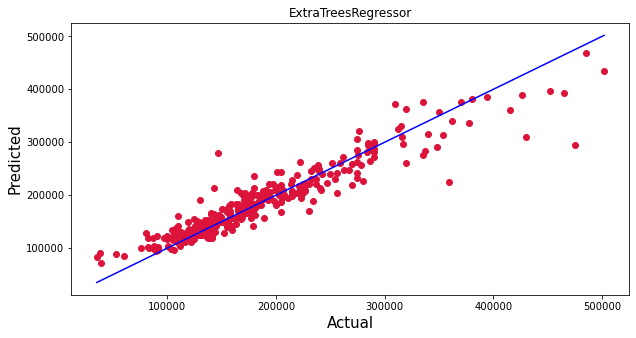

In [131]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("ExtraTreesRegressor")
plt.show()

We can see pink dots they are very close to our line

## Perdiction house price for separatly provided test data set

In [132]:
Predicted_Sale_Price=model.predict(X_1)
Predicted_Sale_Price

array([332375.55, 210515.57, 244111.5 , 170349.72, 264228.96,  91175.  ,
       153622.8 , 328121.36, 236679.95, 165715.9 ,  94208.22, 142926.87,
       123363.06, 187514.81, 282856.63, 134896.67, 119423.09, 135284.5 ,
       175886.52, 208061.28, 144458.23, 164303.31, 157639.24, 101926.  ,
       114056.71, 132900.84, 179590.23, 150975.58, 185619.26, 106623.45,
       138505.16, 203683.51, 229936.11, 158121.  , 127753.04, 181072.22,
       204193.43, 124580.04, 161294.37, 154530.5 , 123046.89, 276113.44,
       200641.89, 200605.49, 150195.8 , 128344.5 , 129353.75, 112496.37,
       211840.01, 343669.98, 148008.83, 214957.77, 115263.26, 104656.67,
       274758.19, 137184.74, 152091.87, 182005.75, 118347.74, 256812.62,
        99696.87, 195395.74, 137580.9 , 154910.86, 212907.84,  98534.5 ,
       153506.  , 205562.74, 150331.5 , 158771.5 , 268638.68, 175085.97,
       164537.13, 156126.06, 147674.89, 220835.86, 312666.74, 193096.07,
       288047.96, 149886.  , 214812.77, 138758.55, 

In [133]:
# Making dataframe for predicted SalePrice
House_Price_Predictions=pd.DataFrame()
House_Price_Predictions["SalePrice"]=Predicted_Sale_Price
House_Price_Predictions.head(10)

SalePrice
0  332375.55
1  210515.57
2  244111.50
3  170349.72
4  264228.96
5   91175.00
6  153622.80
7  328121.36
8  236679.95
9  165715.90

In [134]:
# lets save the predictions to csv
House_Price_Predictions.to_csv("House_Price_Predictions.csv",index=False)

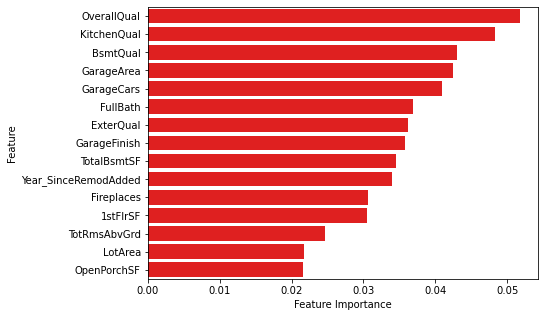

In [136]:
Extr_feature_importances = Best_mod.feature_importances_
Extr_feature_importances = pd.Series(Extr_feature_importances, 
                                    index=X_train.columns.values).sort_values(ascending=False).head(15)

fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x=Extr_feature_importances, y=Extr_feature_importances.index, color="r");
plt.xlabel('Feature Importance');
plt.ylabel('Feature');

# Thank you